# UTS IBDA2023
Anggota:
1. Badia Sihaloho / 10101190602
2. Christyane Zabdi / 10101190118
3. Jabez Joeniko / 10101200141

Tujuan dari proyek kali ini adalah sebagai usaha untuk menerapkan kebijakan yang dapat mengurangi pertambahan kasus COVID-19 di Jakarta, Pemerintah Provinsi DKI Jakarta berencana untuk melakukan beberapa analisa sebagai landasan pengambilan kebijakan. Beberapa analisa yang perlu dilakukan diantaranya adalah memprediksi pertumbuhan kasus COVID-19 di Jakarta dan menguji efektivitas dari pemberian vaksin yang sudah diberikan kepada sejumlah pejabat publik, petugas kesehatan, dan orang lanjut usia.

## Memanggil Data
Memanggil Data yang diperlukan, disimpan pada variabel **data**. Dikarenakan data yang digunakan bukan berupa CSV, maka metode yang digunakan untuk membaca data adalah 'read_excel'.

In [1]:
# Mengimport Library yang diperlukan dalam pengerjaan
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt

In [2]:
# Memanggil data dan menyimpan data yang diperlukan
data = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name='Data Indonesia dan Jakarta')
data

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),...,Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,2020-03-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-03-02,0,0,2,2,0,0,0,0,0,...,0,0,2,2,0,0,0,0,0,0
2,2020-03-03,0,0,2,2,1,0,0,2,3,...,0,0,0,0,1,0,0,2,3,2
3,2020-03-04,0,0,2,2,1,0,0,2,3,...,0,0,0,0,0,0,0,0,0,0
4,2020-03-05,0,0,2,2,3,0,0,4,7,...,0,0,0,0,2,0,0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,2021-04-07,42064,1391742,113570,1547376,6391,375651,2814,3482,388338,...,87,5769,-996,4860,12,571,109,170,862,279
403,2021-04-08,42227,1399382,111271,1552880,6410,376270,3244,3653,389577,...,163,7640,-2299,5504,19,619,430,171,1239,601
404,2021-04-09,42348,1405679,110118,1558145,6424,376959,3506,3701,390590,...,121,6297,-1153,5265,14,689,262,48,1013,310
405,2021-04-10,42443,1409288,111137,1562868,6435,377797,3716,3619,391567,...,95,3609,1019,4723,11,838,210,-82,977,128


Setelah memanggil data, kita akan melihat apakah data yang kita memiliki mempunyai nilai NaN dengan menggunakan '.info()'. Dapat kita lihat dibawah bahwa data yang kita miliki tidak memiliki nilai NaN sama sekali, sehingga kita tidak perlu merapikan data yang kita miliki.

**Note**: Pada kelompok kami terdapat dua perbedaan, yaitu ketika Jupyter Notebook kami mendeteksi #DIV0 dengan NaN atau tetap dengan string #DIV0.

In [3]:
# Mengecek rincian data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Tanggal                          407 non-null    datetime64[ns]
 1   Meninggal (Indonesia)            407 non-null    int64         
 2   Sembuh (Indonesia)               407 non-null    int64         
 3   Dirawat (Indonesia)              407 non-null    int64         
 4   Positif (Indonesia)              407 non-null    int64         
 5   Meninggal (Jakarta)              407 non-null    int64         
 6   Sembuh (Jakarta)                 407 non-null    int64         
 7   Self-Isolation (Jakarta)         407 non-null    int64         
 8   Dirawat (Jakarta)                407 non-null    int64         
 9   Positif (Jakarta)                407 non-null    int64         
 10  Positif Aktif (Jakarta)          407 non-null    int64        

# Langkah 1

## Membagi Data berdasarkan Periode
Membagi data pada setiap periode yang pertama yang dimulai dari 1 Maret 2020 semenjak kasus pertama, kemudian mulai dari 1 Januari 2021 semenjak awal tahun baru, dan yang terakhir mulai dari 9 Februari 2021 semenjak diadakan PPKM jilid 2.

#### Mulai dari 1 Maret 2020 semenjak kasus pertama
Data yang digunakan pada periode ini tidak perlu dibagi lagi karena data ini sudah dimulai sejak kasus pertama.

In [4]:
#periode 1, 1 Maret 2020
data_from_maret_2020 = data.drop([data.index[-1]])
data_from_maret_2020.head()

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),...,Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,2020-03-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-03-02,0,0,2,2,0,0,0,0,0,...,0,0,2,2,0,0,0,0,0,0
2,2020-03-03,0,0,2,2,1,0,0,2,3,...,0,0,0,0,1,0,0,2,3,2
3,2020-03-04,0,0,2,2,1,0,0,2,3,...,0,0,0,0,0,0,0,0,0,0
4,2020-03-05,0,0,2,2,3,0,0,4,7,...,0,0,0,0,2,0,0,2,4,2


In [5]:
row_1, col_1 = data_from_maret_2020.shape
print(row_1)

406


#### Mulai dari 1 Januari 2021 semenjak awal tahun baru
<br> 
Data dalam periode ini perlu melihat index lalu membaginya dengan index dimana data dimulai dari tanggal 01 Januari 2021.

In [6]:
# Melihat index data sesuai dengan tanggal yang diinginkan.
start_from_january = data.loc[data['Tanggal']=='2021-01-01 00:00:00']
index_jan = start_from_january.index[0]
index_jan

306

In [7]:
# Membagi data dimulai dari index yang dimaksud sampai akhir data.
# periode 2, 1 Januari 2020
data_from_january_2021 = data[index_jan:].drop([data.index[-1]])
data_from_january_2021.head()

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),...,Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
306,2021-01-01,22329,617936,111005,751270,3308,166512,10082,5789,185691,...,191,6839,1042,8072,21,1631,336,-32,1956,304
307,2021-01-02,22555,625518,110400,758473,3334,168781,10872,4599,187586,...,226,7582,-605,7203,26,2269,790,-1190,1895,-400
308,2021-01-03,22734,631937,110679,765350,3345,170510,10978,4410,189243,...,179,6419,279,6877,11,1729,106,-189,1657,-83
309,2021-01-04,22911,639103,110089,772103,3369,173036,10371,4299,191075,...,177,7166,-590,6753,24,2526,-607,-111,1832,-718
310,2021-01-05,23109,645746,110693,779548,3392,174131,10897,4479,192899,...,198,6643,604,7445,23,1095,526,180,1824,706


In [8]:
# Melihat jumlah data yang dimiliki pada periode 2
row_2, col_2 = data_from_january_2021.shape
print(row_2)

100


#### Mulai dari 9 Februari 2021 semenjak diadakan PPKM jilid 2

Data dalam periode ini perlu melihat index lalu membaginya dengan index dimana data dimulai dari tanggal 09 Februari 2021.

In [9]:
# Melihat index data sesuai dengan tanggal yang diinginkan.
start_from_february_2021 = data.loc[data['Tanggal']=='2021-02-09 00:00:00']
index_feb = start_from_february_2021.index[0]
index_feb

345

In [10]:
# Membagi data dimulai dari index yang dimaksud sampai akhir data.
# periode 2, 9 Februari 2020
data_from_february_2021 = data[index_feb:].drop([data.index[-1]])
data_from_february_2021.head()

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),...,Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
345,2021-02-09,31976,973452,169351,1174779,4681,271573,18174,5978,300406,...,213,10424,-1937,8700,50,2788,408,191,3437,599
346,2021-02-10,32167,982972,168416,1183555,4725,274817,16676,7497,303715,...,191,9520,-935,8776,44,3244,-1498,1519,3309,21
347,2021-02-11,32381,993117,166492,1191990,4748,278822,14119,8540,306229,...,214,10145,-1924,8435,23,4005,-2557,1043,2514,-1514
348,2021-02-12,32656,1004117,165086,1201859,4798,284579,10774,9888,310039,...,275,11000,-1406,9869,50,5757,-3345,1348,3810,-1997
349,2021-02-13,32936,1016036,161731,1210703,4850,289189,9644,9374,313057,...,280,11919,-3355,8844,52,4610,-1130,-514,3018,-1644


In [11]:
# Melihat jumlah data yang dimiliki pada periode 3.
row_3, col_3 = data_from_february_2021.shape
print(row_3)

61


## Modelling, Regresi Linear

Setelah membagi data yang dimiliki, selanjutnya kita akan membuat model dan menerapkan regresi linear dari ketiga data yang sudah kita dapatkan. Setelah mendapatkan model regresi tersebut, maka kita akan menganalisa data tersebut untuk membuat prediksi terhadap kasus COVID-19 untuk dua minggu kedepan. 

Pada modelling kali ini, untuk mencari nilai prediksi nilai y, kita menggunakan rumus:
<br>
\begin{equation} 
y = mx + b 
\end{equation}
<br>
Dengan:
* x = data x pada masing-masing periode
* m = nilai koefisien yang didapatkan pada Linear Regression
* b = nilai intercept yang didapatkan pada Linear Regression

Hal ini akan dijelaskan secara lebih lanjut pada bagian Analisis data.

#### Regresi Linear Data Periode 1

Pertama, kita harus memasukkan data yang mana yang akan menjadi data x dan y. Disini, kita akan menggunakan data tanggal dari pertama mulainya kasus COVID-19 di Indonesia yaitu mulai pada Maret 2020 untuk data x, sedangkan data Positif Harian (Jakarta) untuk data y. Kemudian, kita perlu mengubah data tanggal menjadi numerik agar lebih mudah diolah.

In [12]:
# Membagi data ke dalam x dan y --> periode 1
x_periode_1 = data_from_maret_2020.iloc[:, :1].values 
y_periode_1 = data_from_maret_2020.iloc[:, -2].values.reshape(-1, 1)

In [13]:
# Mengecek data
x_periode_1, y_periode_1

(array([['2020-03-01T00:00:00.000000000'],
        ['2020-03-02T00:00:00.000000000'],
        ['2020-03-03T00:00:00.000000000'],
        ['2020-03-04T00:00:00.000000000'],
        ['2020-03-05T00:00:00.000000000'],
        ['2020-03-06T00:00:00.000000000'],
        ['2020-03-07T00:00:00.000000000'],
        ['2020-03-08T00:00:00.000000000'],
        ['2020-03-09T00:00:00.000000000'],
        ['2020-03-10T00:00:00.000000000'],
        ['2020-03-11T00:00:00.000000000'],
        ['2020-03-12T00:00:00.000000000'],
        ['2020-03-13T00:00:00.000000000'],
        ['2020-03-14T00:00:00.000000000'],
        ['2020-03-15T00:00:00.000000000'],
        ['2020-03-16T00:00:00.000000000'],
        ['2020-03-17T00:00:00.000000000'],
        ['2020-03-18T00:00:00.000000000'],
        ['2020-03-19T00:00:00.000000000'],
        ['2020-03-20T00:00:00.000000000'],
        ['2020-03-21T00:00:00.000000000'],
        ['2020-03-22T00:00:00.000000000'],
        ['2020-03-23T00:00:00.000000000'],
        ['2

In [14]:
# Mengubah data tanggal menjadi sebuah nomor atau index
import numpy as np

# mengubah data date.
xrow_1, xcol_1 = x_periode_1.shape
print(xrow_1)

x_periode_1 =[]

for i in range (1, xrow_1+1):
    x_periode_1.append(i)

# Mengubah x menjadi array 2D
for index in range(0, len(x_periode_1)):
    x_periode_1 = np.c_[x_periode_1]

x_periode_1

406


array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
      

Dapat kita lihat diatas, setelah data tanggal diubah menjadi angka (numerik) datanya menjadi lebih rapi dan lebih singkat. Data diatas, akan menjadi data x. Berikut merupakan plotting data dari x dan y pada periode 1.

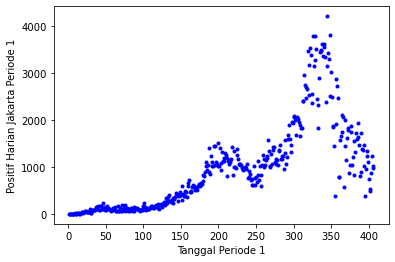

In [15]:
# Plotting data x dan y.
plt.plot(x_periode_1, y_periode_1, "b.")
plt.xlabel("Tanggal Periode 1")
plt.ylabel("Positif Harian Jakarta Periode 1")
plt.show()

Selanjutnya, kita akan melakukan Linear Regression pada data diatas untuk melihat prediksi yang sesuai dengan data diatas. Kali ini kita akan menggunakan dua model yaitu model Linear Regression dengan penerapan intercept dan tanpa penerapan intercept. Apa perbedaannya? Ketika kita menerapkan **intercept=True**, maka garis prediksinya akan menyesuaikan diri dengan sumbu y yang paling sesuai (jika dilihat dari plot dibawah ini, maka kita dapat melihat garisnya mulai dari minus). Sedangkan ketika kita menerapkan **intercept=False**, maka garis prediksinya akan dipaksa untuk mulai dari titik awal plot tersebut (jika dilihat dari plot dibawah, maka kita dapat melihat garisnya mulai dari titik (0, 0)).

In [16]:
# Import Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg_fit_true_periode_1 = LinearRegression(fit_intercept=True)
lin_reg_fit_false_periode_1 = LinearRegression(fit_intercept=False)

Intercept when fit_intercept=True :  [-269.96792556]
Intercept when fit_intercept=False :  0.0


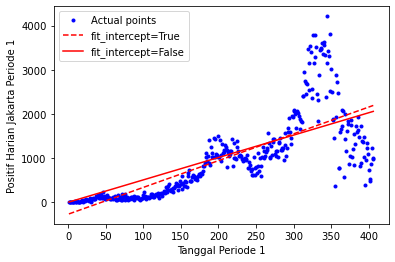

In [17]:
# Fit nilai x dan y
lin_reg_fit_true_periode_1.fit(x_periode_1, y_periode_1)
lin_reg_fit_false_periode_1.fit(x_periode_1, y_periode_1)

# Mencetak nilai intercept ketika 'fit_intercept=True' dan ketika 'fit_intercept=False'
print('Intercept when fit_intercept=True : ', lin_reg_fit_true_periode_1.intercept_)
print('Intercept when fit_intercept=False : ', lin_reg_fit_false_periode_1.intercept_)

# Kalkulasi penghitungan rumus 'y = mx + b'
lr_fi_true_ypred_periode_1 = np.dot(x_periode_1, lin_reg_fit_true_periode_1.coef_) + lin_reg_fit_true_periode_1.intercept_
lr_fi_false_ypred_periode_1 = np.dot(x_periode_1, lin_reg_fit_false_periode_1.coef_) + lin_reg_fit_false_periode_1.intercept_

# Plotting Linear Regression
plt.plot(x_periode_1, y_periode_1, "b.", label='Actual points')
plt.plot(x_periode_1, lr_fi_true_ypred_periode_1, 'r--', label='fit_intercept=True')
plt.plot(x_periode_1, lr_fi_false_ypred_periode_1, 'r-', label='fit_intercept=False')
plt.xlabel("Tanggal Periode 1")
plt.ylabel("Positif Harian Jakarta Periode 1")
plt.legend()

Pada plotting model Linear Regression diatas dapat kita lihat bahwa terdapat perbedaan pada kedua garis prediksi tersebut. Kita dapat melihat bahwa garis putus-putus (fit_intercept=True) menyesuaikan titik awal sumbu y mulai dari minus. Hal ini terjadi karena garis ini menyesuaikan diri dengan grafik plot data yang ada.

#### Regresi Linear Data Periode 2
Penerapan Linear Regression yang sama akan kita lakukan pada data yang dimulai pada awal tahun 2021. Langkah-langkah yang kita lakukan sama dengan apa yang dilakukan pada data periode 1 sebelumnya.

In [18]:
# Membagi data ke dalam x dan y --> periode 2
x_periode_2 = data_from_january_2021.iloc[:, :1].values 
y_periode_2 = data_from_january_2021.iloc[:, -2].values.reshape(-1, 1)

In [19]:
# Mengecek data x dan y periode 2
x_periode_2, y_periode_2

(array([['2021-01-01T00:00:00.000000000'],
        ['2021-01-02T00:00:00.000000000'],
        ['2021-01-03T00:00:00.000000000'],
        ['2021-01-04T00:00:00.000000000'],
        ['2021-01-05T00:00:00.000000000'],
        ['2021-01-06T00:00:00.000000000'],
        ['2021-01-07T00:00:00.000000000'],
        ['2021-01-08T00:00:00.000000000'],
        ['2021-01-09T00:00:00.000000000'],
        ['2021-01-10T00:00:00.000000000'],
        ['2021-01-11T00:00:00.000000000'],
        ['2021-01-12T00:00:00.000000000'],
        ['2021-01-13T00:00:00.000000000'],
        ['2021-01-14T00:00:00.000000000'],
        ['2021-01-15T00:00:00.000000000'],
        ['2021-01-16T00:00:00.000000000'],
        ['2021-01-17T00:00:00.000000000'],
        ['2021-01-18T00:00:00.000000000'],
        ['2021-01-19T00:00:00.000000000'],
        ['2021-01-20T00:00:00.000000000'],
        ['2021-01-21T00:00:00.000000000'],
        ['2021-01-22T00:00:00.000000000'],
        ['2021-01-23T00:00:00.000000000'],
        ['2

In [20]:
# Mengubah data tanggal menjadi numerik
xrow_2, xcol_2 = x_periode_2.shape
print(xrow_2)

x_periode_2 =[]
start = xrow_1 - xrow_2
print(start)

for i in range (start+1, xrow_1+1):
    x_periode_2.append(i)

# Mengubah data x_periode_2 menjadi array 2D
for index in range(0, len(x_periode_2)):
    x_periode_2 = np.c_[x_periode_2]

x_periode_2.shape, x_periode_2

100
306


((100, 1),
 array([[307],
        [308],
        [309],
        [310],
        [311],
        [312],
        [313],
        [314],
        [315],
        [316],
        [317],
        [318],
        [319],
        [320],
        [321],
        [322],
        [323],
        [324],
        [325],
        [326],
        [327],
        [328],
        [329],
        [330],
        [331],
        [332],
        [333],
        [334],
        [335],
        [336],
        [337],
        [338],
        [339],
        [340],
        [341],
        [342],
        [343],
        [344],
        [345],
        [346],
        [347],
        [348],
        [349],
        [350],
        [351],
        [352],
        [353],
        [354],
        [355],
        [356],
        [357],
        [358],
        [359],
        [360],
        [361],
        [362],
        [363],
        [364],
        [365],
        [366],
        [367],
        [368],
        [369],
        [370],
        [371],
        [372],

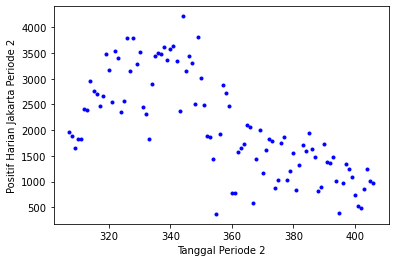

In [21]:
# Plotting data periode 2
plt.plot(x_periode_2, y_periode_2, "b.")
plt.xlabel("Tanggal Periode 2")
plt.ylabel("Positif Harian Jakarta Periode 2")
plt.show()

In [22]:
# Linear Regression
lin_reg_fit_true_periode_2 = LinearRegression(fit_intercept=True)
lin_reg_fit_false_periode_2 = LinearRegression(fit_intercept=False)

Intercept when fit_intercept=True :  [10427.16708071]
Intercept when fit_intercept=False :  0.0


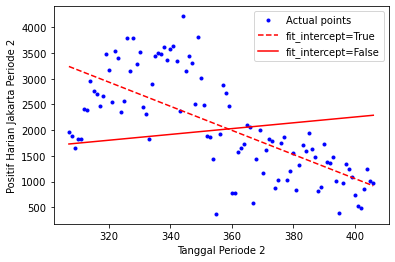

In [23]:
# Mencari y_predict
lin_reg_fit_true_periode_2 .fit(x_periode_2, y_periode_2)
lin_reg_fit_false_periode_2.fit(x_periode_2, y_periode_2)

# Print nilai intercept masing-masing Linear Regression
print('Intercept when fit_intercept=True : ', lin_reg_fit_true_periode_2 .intercept_)
print('Intercept when fit_intercept=False : ', lin_reg_fit_false_periode_2.intercept_)

# Kalkulasi rumus "y = mx + b"
lr_fi_true_ypred_periode_2 = np.dot(x_periode_2, lin_reg_fit_true_periode_2 .coef_) + lin_reg_fit_true_periode_2 .intercept_
lr_fi_false_ypred_periode_2 = np.dot(x_periode_2, lin_reg_fit_false_periode_2.coef_) + lin_reg_fit_false_periode_2.intercept_

# Plotting data dan membandingkan Linear Regression fit_intercept=True dan fit_intercept=False
plt.plot(x_periode_2, y_periode_2, "b.", label='Actual points')
plt.plot(x_periode_2, lr_fi_true_ypred_periode_2, 'r--', label='fit_intercept=True')
plt.plot(x_periode_2, lr_fi_false_ypred_periode_2, 'r-', label='fit_intercept=False')
plt.xlabel("Tanggal Periode 2")
plt.ylabel("Positif Harian Jakarta Periode 2")
plt.legend()

Dari plotting data prediksi diatas, dapat kita lihat bahwa prediksi dengan fit_intercept=False cenderung mengikuti titik awal pada scatter plot data awalnya. Sedangkan prediksi dengan fit_intercept=True cenderung untuk menyesuaikan mengikuti kumpulan data. Garisnya mulai dari titik sekitar 3250-an karena garis tersebut mengikuti kumpulan dari sebaran data yang ada. Jika dilihat sekilas, garis dengan fit_intercept=True terkesan lebih bagus dan tepat, namun, jika kita lihat pada data periode 1, maka garis yang lebih tepat adalah garis dengan fit_intercept=False.

#### Regresi Linear Data Periode 3
Penerapan Linear Regression yang sama akan kita lakukan pada data yang dimulai pada 9 Februari 2021. Langkah-langkah yang kita lakukan sama dengan apa yang dilakukan pada data periode 2 sebelumnya.

In [24]:
# Membagi data ke dalam x dan y --> periode 2
x_periode_3 = data_from_february_2021.iloc[:, :1].values 
y_periode_3 = data_from_february_2021.iloc[:, -2].values.reshape(-1, 1)

In [25]:
# Mengecek data x dan y periode 2
x_periode_3, y_periode_3

(array([['2021-02-09T00:00:00.000000000'],
        ['2021-02-10T00:00:00.000000000'],
        ['2021-02-11T00:00:00.000000000'],
        ['2021-02-12T00:00:00.000000000'],
        ['2021-02-13T00:00:00.000000000'],
        ['2021-02-14T00:00:00.000000000'],
        ['2021-02-15T00:00:00.000000000'],
        ['2021-02-16T00:00:00.000000000'],
        ['2021-02-17T00:00:00.000000000'],
        ['2021-02-18T00:00:00.000000000'],
        ['2021-02-19T00:00:00.000000000'],
        ['2021-02-20T00:00:00.000000000'],
        ['2021-02-21T00:00:00.000000000'],
        ['2021-02-22T00:00:00.000000000'],
        ['2021-02-23T00:00:00.000000000'],
        ['2021-02-24T00:00:00.000000000'],
        ['2021-02-25T00:00:00.000000000'],
        ['2021-02-26T00:00:00.000000000'],
        ['2021-02-27T00:00:00.000000000'],
        ['2021-02-28T00:00:00.000000000'],
        ['2021-03-01T00:00:00.000000000'],
        ['2021-03-02T00:00:00.000000000'],
        ['2021-03-03T00:00:00.000000000'],
        ['2

In [26]:
# Mengubah data tanggal menjadi numerik
xrow_3, xcol_3 = x_periode_3.shape
print(xrow_3)

x_periode_3 =[]
start = xrow_1 - xrow_3
print(start)

for i in range (start+1, xrow_1+1):
    x_periode_3.append(i)

# Mengubah data x_periode_2 menjadi array 2D
for index in range(0, len(x_periode_3)):
    x_periode_3 = np.c_[x_periode_3]

x_periode_3.shape, x_periode_3

61
345


((61, 1),
 array([[346],
        [347],
        [348],
        [349],
        [350],
        [351],
        [352],
        [353],
        [354],
        [355],
        [356],
        [357],
        [358],
        [359],
        [360],
        [361],
        [362],
        [363],
        [364],
        [365],
        [366],
        [367],
        [368],
        [369],
        [370],
        [371],
        [372],
        [373],
        [374],
        [375],
        [376],
        [377],
        [378],
        [379],
        [380],
        [381],
        [382],
        [383],
        [384],
        [385],
        [386],
        [387],
        [388],
        [389],
        [390],
        [391],
        [392],
        [393],
        [394],
        [395],
        [396],
        [397],
        [398],
        [399],
        [400],
        [401],
        [402],
        [403],
        [404],
        [405],
        [406]]))

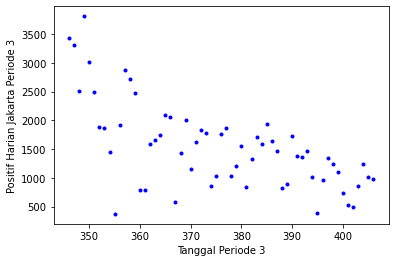

In [27]:
# Plotting data Periode 3
plt.plot(x_periode_3, y_periode_3, "b.")
plt.xlabel("Tanggal Periode 3")
plt.ylabel("Positif Harian Jakarta Periode 3")
plt.show()

In [28]:
# Linear Regression
lin_reg_fit_true_periode_3 = LinearRegression(fit_intercept=True)
lin_reg_fit_false_periode_3 = LinearRegression(fit_intercept=False)

Intercept when fit_intercept=True :  [11876.13262824]
Intercept when fit_intercept=False :  0.0


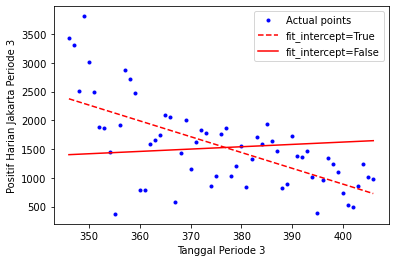

In [29]:
# Mencari y_predict
lin_reg_fit_true_periode_3.fit(x_periode_3, y_periode_3)
lin_reg_fit_false_periode_3.fit(x_periode_3, y_periode_3)

# Mencetak nilai intercept masing-masing Linear Regression
print('Intercept when fit_intercept=True : ', lin_reg_fit_true_periode_3.intercept_)
print('Intercept when fit_intercept=False : ', lin_reg_fit_false_periode_3.intercept_)

# Kalkulasi rumus 'y = mx + b'
lr_fi_true_ypred_periode_3 = np.dot(x_periode_3, lin_reg_fit_true_periode_3.coef_) + lin_reg_fit_true_periode_3.intercept_
lr_fi_false_ypred_periode_3 = np.dot(x_periode_3, lin_reg_fit_false_periode_3.coef_) + lin_reg_fit_false_periode_3.intercept_

# Plotting data dan membandingkan Linear Regression fit_intercept=True dan fit_intercept=False
plt.plot(x_periode_3, y_periode_3, "b.", label='Actual points')
plt.plot(x_periode_3, lr_fi_true_ypred_periode_3, 'r--', label='fit_intercept=True')
plt.plot(x_periode_3, lr_fi_false_ypred_periode_3, 'r-', label='fit_intercept=False')
plt.xlabel("Tanggal Periode 3")
plt.ylabel("Positif Harian Jakarta Periode 3")
plt.legend()

Dapat kita lihat pada plotting data dengan hasil prediksi, kurang lebih memiliki hasil yang sama dengan grafik pada periode 2. Perbedaannya adalah garis prediksi dengan fit_intercept=True melenceng cukup jauh jika dibandingkan dengan grafik periode 1.

### Analisis Data
Pada bagian ini, kita akan menganalisis pengaruh nilai m pada rumus:
<br>
\begin{equation} 
y = mx +b 
\end{equation}
<br>
Dalam melakukan Regresi Linear diatas, kita telah melihat bagaimana penghitungan y_pred dilakukan. Nilai m yang digunakan selama ini adalah merupakan nilai koefisien dari Linear Regression dari masing-masing periode, sedangkan b adalah nilai intercept pada Linear Regression pada masing-masing periode.
<br>
<br>
Pertama-tama, mari kita lihat terlebih dahulu nilai x_periode_3. Disini kita dapat melihat bahwa data x_periode_3 berupa angka mulai dari 346 sampai dengan 401. Setelah itu, kita melihat nilai m yang mana adalah lin_reg_fit_true_periode_3.coef_. Sampai titik ini, kita mengetahui bahwa nilai m adalah negatif (ketika fit_intercept=True). Sedangkan nilai m positif ketika fit_intercept=False. Pengaruh nilai m disini adalah untuk memengaruhi kemiringan dari garis prediksi. 

In [30]:
# Melihat nilai x pada periode 1
x_periode_1

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
      

In [31]:
# Melihat nilai m pada 'fit_intercept=True'
lin_reg_fit_true_periode_1.coef_

array([[6.06593938]])

In [32]:
# Melihat nilai m pada 'fit_intercept=False'
lin_reg_fit_false_periode_1.coef_

array([[5.06974778]])

In [33]:
# Melihat nilai mx pada 'fit_intercept=True'
mx1 = np.dot(x_periode_1, lin_reg_fit_true_periode_1.coef_)
mx1

array([[   6.06593938],
       [  12.13187877],
       [  18.19781815],
       [  24.26375753],
       [  30.32969692],
       [  36.3956363 ],
       [  42.46157568],
       [  48.52751507],
       [  54.59345445],
       [  60.65939383],
       [  66.72533321],
       [  72.7912726 ],
       [  78.85721198],
       [  84.92315136],
       [  90.98909075],
       [  97.05503013],
       [ 103.12096951],
       [ 109.1869089 ],
       [ 115.25284828],
       [ 121.31878766],
       [ 127.38472705],
       [ 133.45066643],
       [ 139.51660581],
       [ 145.5825452 ],
       [ 151.64848458],
       [ 157.71442396],
       [ 163.78036335],
       [ 169.84630273],
       [ 175.91224211],
       [ 181.9781815 ],
       [ 188.04412088],
       [ 194.11006026],
       [ 200.17599964],
       [ 206.24193903],
       [ 212.30787841],
       [ 218.37381779],
       [ 224.43975718],
       [ 230.50569656],
       [ 236.57163594],
       [ 242.63757533],
       [ 248.70351471],
       [ 254.769

In [34]:
# Melihat nilai mx pada 'fit_intercept=False'
mx2 = np.dot(x_periode_1, lin_reg_fit_false_periode_1.coef_)
mx2

array([[   5.06974778],
       [  10.13949555],
       [  15.20924333],
       [  20.2789911 ],
       [  25.34873888],
       [  30.41848666],
       [  35.48823443],
       [  40.55798221],
       [  45.62772998],
       [  50.69747776],
       [  55.76722554],
       [  60.83697331],
       [  65.90672109],
       [  70.97646886],
       [  76.04621664],
       [  81.11596442],
       [  86.18571219],
       [  91.25545997],
       [  96.32520774],
       [ 101.39495552],
       [ 106.46470329],
       [ 111.53445107],
       [ 116.60419885],
       [ 121.67394662],
       [ 126.7436944 ],
       [ 131.81344217],
       [ 136.88318995],
       [ 141.95293773],
       [ 147.0226855 ],
       [ 152.09243328],
       [ 157.16218105],
       [ 162.23192883],
       [ 167.30167661],
       [ 172.37142438],
       [ 177.44117216],
       [ 182.51091993],
       [ 187.58066771],
       [ 192.65041549],
       [ 197.72016326],
       [ 202.78991104],
       [ 207.85965881],
       [ 212.929

Setelah melihat beberapa nilai diatas, dapat kita lihat perbedaan garis prediksi **sebelum ditambahkan dengan nilai b** dibawah untuk melihat pengaruh nilai m. Kita dapat melihat tingkat kemiringan yang berbeda pada 2 garis tersebut.

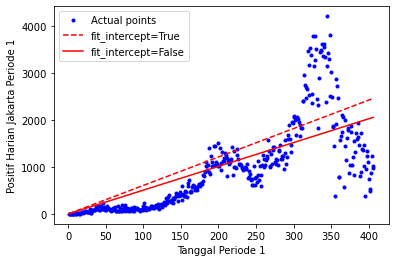

In [35]:
plt.plot(x_periode_1, y_periode_1, "b.", label='Actual points')
plt.plot(x_periode_1, mx1, 'r--', label='fit_intercept=True')
plt.plot(x_periode_1, mx2, 'r-', label='fit_intercept=False')
plt.xlabel("Tanggal Periode 1")
plt.ylabel("Positif Harian Jakarta Periode 1")
plt.legend()

In [36]:
# Melihat nilai b pada 'fit_intercept=True'
lin_reg_fit_true_periode_1.intercept_

array([-269.96792556])

In [37]:
# Melihat nilai b pada 'fit_intercept=False'
lin_reg_fit_false_periode_1.intercept_

0.0

In [38]:
# Melihat nilai y_pred pada 'fit_intercept=True'
lr_fi_true_ypred_periode_1

array([[-263.90198618],
       [-257.83604679],
       [-251.77010741],
       [-245.70416803],
       [-239.63822865],
       [-233.57228926],
       [-227.50634988],
       [-221.4404105 ],
       [-215.37447111],
       [-209.30853173],
       [-203.24259235],
       [-197.17665296],
       [-191.11071358],
       [-185.0447742 ],
       [-178.97883481],
       [-172.91289543],
       [-166.84695605],
       [-160.78101666],
       [-154.71507728],
       [-148.6491379 ],
       [-142.58319851],
       [-136.51725913],
       [-130.45131975],
       [-124.38538036],
       [-118.31944098],
       [-112.2535016 ],
       [-106.18756222],
       [-100.12162283],
       [ -94.05568345],
       [ -87.98974407],
       [ -81.92380468],
       [ -75.8578653 ],
       [ -69.79192592],
       [ -63.72598653],
       [ -57.66004715],
       [ -51.59410777],
       [ -45.52816838],
       [ -39.462229  ],
       [ -33.39628962],
       [ -27.33035023],
       [ -21.26441085],
       [ -15.198

In [39]:
# Melihat nilai y_pred pada 'fit_intercept=False'
lr_fi_false_ypred_periode_1

array([[   5.06974778],
       [  10.13949555],
       [  15.20924333],
       [  20.2789911 ],
       [  25.34873888],
       [  30.41848666],
       [  35.48823443],
       [  40.55798221],
       [  45.62772998],
       [  50.69747776],
       [  55.76722554],
       [  60.83697331],
       [  65.90672109],
       [  70.97646886],
       [  76.04621664],
       [  81.11596442],
       [  86.18571219],
       [  91.25545997],
       [  96.32520774],
       [ 101.39495552],
       [ 106.46470329],
       [ 111.53445107],
       [ 116.60419885],
       [ 121.67394662],
       [ 126.7436944 ],
       [ 131.81344217],
       [ 136.88318995],
       [ 141.95293773],
       [ 147.0226855 ],
       [ 152.09243328],
       [ 157.16218105],
       [ 162.23192883],
       [ 167.30167661],
       [ 172.37142438],
       [ 177.44117216],
       [ 182.51091993],
       [ 187.58066771],
       [ 192.65041549],
       [ 197.72016326],
       [ 202.78991104],
       [ 207.85965881],
       [ 212.929

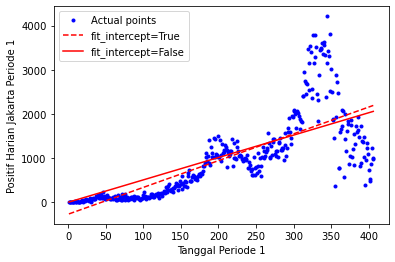

In [40]:
plt.plot(x_periode_1, y_periode_1, "b.", label='Actual points')
plt.plot(x_periode_1, lr_fi_true_ypred_periode_1, 'r--', label='fit_intercept=True')
plt.plot(x_periode_1, lr_fi_false_ypred_periode_1, 'r-', label='fit_intercept=False')
plt.xlabel("Tanggal Periode 1")
plt.ylabel("Positif Harian Jakarta Periode 1")
plt.legend()

Seperti yang telah kami jelaskan diatas, nilai intercept memengaruhi penyesuaian letak pada sumbu y dengan menyesuaikan grafik data yang ada.

### Melakukan Prediksi untuk 2 Minggu kedepan (6 April 2021 - 13 April 2021)

Pada bagian ini, kita akan membuat prediksi positif harian Jakarta pada rentang waktu dari tanggal 6 April 2021 sampai dengan 13 April 2021. Langkah-langkah yang kita miliki disini sedikit mirip dengan membuat model regresi linear yang telah lakukan pada ketiga periode data diatas. Perbedaannya adalah kita membutuhkan hasil prediksi untuk periode ke 4 tanpa tau data asli yang dimiliki. Pada tahap ini, kita juga akan membandingkan data hasil prediksi dengan data yang ada pada periode-periode sebelumnya untuk melihat kesesuaiannya.

In [41]:
# Mendata nilai x yang akan diprediksi. 
x_periode_4 = []

for i in range (xrow_1+1, xrow_1+15):
    x_periode_4.append(i)

# Membuat x_periode_4 menjadi array 2D
for index in range(0, len(x_periode_4)):
    x_periode_4 = np.c_[x_periode_4]

x_periode_4.shape, x_periode_4

((14, 1),
 array([[407],
        [408],
        [409],
        [410],
        [411],
        [412],
        [413],
        [414],
        [415],
        [416],
        [417],
        [418],
        [419],
        [420]]))

In [42]:
# Melakukan Linear Regression
lin_reg_periode_4_int_false = LinearRegression(fit_intercept=False)
lin_reg_periode_4_int_true = LinearRegression(fit_intercept=True)

# Fit nilai x dan y
lin_reg_periode_4_int_false.fit(x_periode_1, y_periode_1)
lin_reg_periode_4_int_true.fit(x_periode_1, y_periode_1)

LinearRegression()

In [43]:
# Membuat nilai y_predict untuk periode 4 (rentang waktu yang diinginkan) dengan fit_intercept=False
y_predict_periode_4_int_false = lin_reg_periode_4_int_false.predict(x_periode_4)
y_predict_periode_4_int_false

array([[2063.38734481],
       [2068.45709259],
       [2073.52684036],
       [2078.59658814],
       [2083.66633591],
       [2088.73608369],
       [2093.80583147],
       [2098.87557924],
       [2103.94532702],
       [2109.01507479],
       [2114.08482257],
       [2119.15457034],
       [2124.22431812],
       [2129.2940659 ]])

In [44]:
# Membuat nilai y_predict untuk periode 4 (rentang waktu yang diinginkan) dengan fit_intercept=True
y_predict_periode_4_int_true = lin_reg_periode_4_int_true.predict(x_periode_4)
y_predict_periode_4_int_true

array([[2198.86940339],
       [2204.93534278],
       [2211.00128216],
       [2217.06722154],
       [2223.13316093],
       [2229.19910031],
       [2235.26503969],
       [2241.33097908],
       [2247.39691846],
       [2253.46285784],
       [2259.52879723],
       [2265.59473661],
       [2271.66067599],
       [2277.72661537]])

<function matplotlib.pyplot.show(close=None, block=None)>

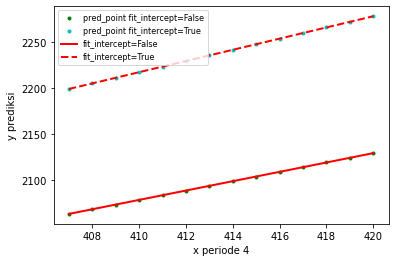

In [45]:
# Membandingkan data dengan data hasil prediksi Linear Regression fit_intercept=False dan fit_intercept=True
plt.plot(x_periode_4, y_predict_periode_4_int_false, "g.", label="pred_point fit_intercept=False")
plt.plot(x_periode_4, y_predict_periode_4_int_true, "c.", label="pred_point fit_intercept=True")

plt.plot(x_periode_4, y_predict_periode_4_int_false, "r-", linewidth=2, label="fit_intercept=False")
plt.plot(x_periode_4, y_predict_periode_4_int_true, "r--", linewidth=2, label="fit_intercept=True")

plt.xlabel('x periode 4')
plt.ylabel('y prediksi')
plt.legend(loc="upper left", fontsize=8)
plt.show

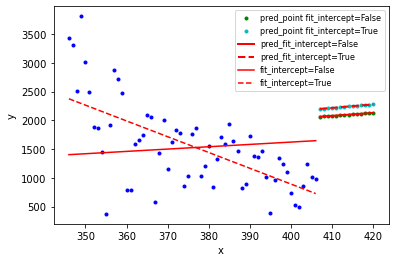

In [46]:
# Membandingkan data dengan data hasil prediksi Linear Regression pada periode 4 dan data periode 3
plt.plot(x_periode_4, y_predict_periode_4_int_false, "g.", label="pred_point fit_intercept=False")
plt.plot(x_periode_4, y_predict_periode_4_int_true, "c.", label="pred_point fit_intercept=True")

plt.plot(x_periode_4, y_predict_periode_4_int_false, "r-", linewidth=2, label="pred_fit_intercept=False")
plt.plot(x_periode_4, y_predict_periode_4_int_true, "r--", linewidth=2, label="pred_fit_intercept=True")

plt.plot(x_periode_3, y_periode_3, "b.")
plt.plot(x_periode_3, lr_fi_false_ypred_periode_3, 'r-', label='fit_intercept=False')
plt.plot(x_periode_3, lr_fi_true_ypred_periode_3, 'r--', label='fit_intercept=True')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="upper right", fontsize=8)
plt.show()

Dapat kita lihat dari graph yang tertera diatas bahwa ketika dibandingkan dengan data periode 3, maka data prediksi yang kita dapatkan sedikit melenceng (tidak sealur / sejalan) dari grafik yang ada pada masa lampau. 

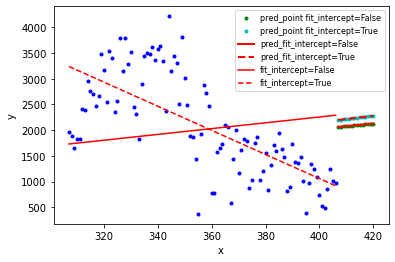

In [47]:
# Membandingkan data dengan data hasil prediksi Linear Regression pada periode 4 dan data periode 2
plt.plot(x_periode_4, y_predict_periode_4_int_false, "g.", label="pred_point fit_intercept=False")
plt.plot(x_periode_4, y_predict_periode_4_int_true, "c.", label="pred_point fit_intercept=True")

plt.plot(x_periode_4, y_predict_periode_4_int_false, "r-", linewidth=2, label="pred_fit_intercept=False")
plt.plot(x_periode_4, y_predict_periode_4_int_true, "r--", linewidth=2, label="pred_fit_intercept=True")

plt.plot(x_periode_2, y_periode_2, "b.")
plt.plot(x_periode_2, lr_fi_false_ypred_periode_2, 'r-', label='fit_intercept=False')
plt.plot(x_periode_2, lr_fi_true_ypred_periode_2, 'r--', label='fit_intercept=True')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="upper right", fontsize=8)
plt.show()

Dari pembandingan data diatas, dapat kita lihat garis prediksi pada periode_2 dengan fit_intercept=True banyak melenceng (tidak sealur atau sejalan) dengan hasil prediksi data 2 minggu kedepan. Sedangkan garis prediksi pada periode_2 dengan fit_intercept=False hanya sedikit melenceng.

<function matplotlib.pyplot.show(close=None, block=None)>

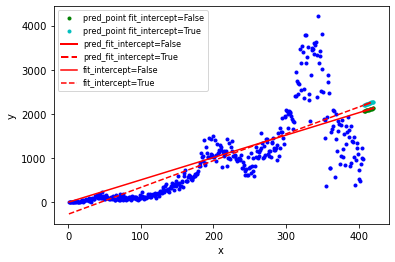

In [48]:
# Membandingkan data dengan data hasil prediksi Linear Regression pada periode 4 dan data periode 1
plt.plot(x_periode_4, y_predict_periode_4_int_false, "g.", label="pred_point fit_intercept=False")
plt.plot(x_periode_4, y_predict_periode_4_int_true, "c.", label="pred_point fit_intercept=True")

plt.plot(x_periode_4, y_predict_periode_4_int_false, "r-", linewidth=2, label="pred_fit_intercept=False")
plt.plot(x_periode_4, y_predict_periode_4_int_true, "r--", linewidth=2, label="pred_fit_intercept=True")

plt.plot(x_periode_1, y_periode_1, "b.")
plt.plot(x_periode_1, lr_fi_false_ypred_periode_1, 'r-', label='fit_intercept=False')
plt.plot(x_periode_1, lr_fi_true_ypred_periode_1, 'r--', label='fit_intercept=True')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="upper left", fontsize=8)
plt.show

Kemudian, jika dilihat dari graph diatas yang membandingkan plotting data masa lampau periode_1 dan prediksi, dapat kita lihat, datanya mengikuti alur (sesuai) dengan data lampau.

# Langkah 2

## Matriks Korelasi Data RDT Ag DKI Jakarta 5 Maret 2021 - 5 April 2021

Membuat scatter plot matrix dan cari nilai korelasi terhadap Positif Harian (Jakarta) (data diambil dari kolom Positif Harian (Jakarta) dari sheet Data Indonesia dan Jakarta) dengan:
* Data Tes Harian, Positive Harian, dan Positivity Harian untuk judul kolom Total DKI Jakarta dari sheet RDT Ag (Anti Gen)
* Data, Vaksinasi 1, Vaksinasi 2, Persentase 1, Persentase 2 untuk judul kolom Tenaga Kesehatan, Lanjut Usia, Pelayan Publik, dan Total untuk judul DKI dari sheet Vaksinasi


#### Mengimport Data

In [49]:
# Import data dan menyimpan data
import pandas as pd
data_ori_1 = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name='RDT Ag')
data_ori_1

,No.,EIS,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,NAR,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Total DKI Jakarta,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,Tgl,Positif,Negatif,Total,Positivity Rate,Positif,Negatif,Total,Positivity Rate,...,Total,Positivity Rate,Tes Harian,Positif Harian,Negatif Harian,Positivity Rate Harian,Total Kumulatif,Positif Kumulatif,Negatif Kumulatif,Positivity Rate Kumulatif
1,1.0,2021-01-01 00:00:00,76,1116,1192,0.0637584,0,0,0,#DIV/0!,...,0,#DIV/0!,1192,76,1116,0.0637584,1192,76,1116,0.0637584
2,2.0,2021-01-02 00:00:00,76,1116,1192,0.0637584,0,0,0,#DIV/0!,...,0,#DIV/0!,0,0,0,#DIV/0!,1192,76,1116,0.0637584
3,3.0,2021-01-03 00:00:00,100,1699,1799,0.0555864,0,0,0,#DIV/0!,...,0,#DIV/0!,607,24,583,0.0395387,1799,100,1699,0.0555864
4,4.0,2021-01-04 00:00:00,100,1699,1799,0.0555864,0,0,0,#DIV/0!,...,0,#DIV/0!,0,0,0,#DIV/0!,1799,100,1699,0.0555864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,97.0,2021-04-07 00:00:00,3387,49908,53295,0.0635519,2145,82939,85084,0.0252104,...,1016,0.0413386,3665,74,3591,0.020191,139395,5574,133821,0.0399871
98,98.0,2021-04-08 00:00:00,3410,50411,53821,0.0633582,2218,86646,88864,0.0249595,...,1016,0.0413386,4306,96,4210,0.0222945,143701,5670,138031,0.0394569
99,99.0,2021-04-09 00:00:00,3431,50905,54336,0.0631441,2301,90667,92968,0.0247505,...,1016,0.0413386,4619,104,4515,0.0225157,148320,5774,142546,0.0389293
100,100.0,2021-04-10 00:00:00,3451,51413,54864,0.062901,2346,94175,96521,0.0243056,...,1016,0.0413386,4081,65,4016,0.0159275,152401,5839,146562,0.0383134


In [50]:
# Memanggil data untuk mengambil data Positif Harian (Jakarta)
dataset = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name='Data Indonesia dan Jakarta')

In [51]:
data_ori_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No.                101 non-null    float64
 1   EIS                102 non-null    object 
 2   Unnamed: 2         102 non-null    object 
 3   Unnamed: 3         102 non-null    object 
 4   Unnamed: 4         102 non-null    object 
 5   Unnamed: 5         102 non-null    object 
 6   NAR                102 non-null    object 
 7   Unnamed: 7         102 non-null    object 
 8   Unnamed: 8         102 non-null    object 
 9   Unnamed: 9         102 non-null    object 
 10  Excel              102 non-null    object 
 11  Unnamed: 11        102 non-null    object 
 12  Unnamed: 12        102 non-null    object 
 13  Unnamed: 13        102 non-null    object 
 14  Total DKI Jakarta  102 non-null    object 
 15  Unnamed: 15        102 non-null    object 
 16  Unnamed: 16        102 non

#### Menyiapkan Data

Pada langkah ini, kita akan mengolah data dalam beberapa langkah sebelum mencari matriks korelasi dan nilai korelasi.
<br>
<br>
**Data Positif Harian RDT Ag**

In [52]:
# Drop data yang tidak diperlukan
data_daily_positive = data_ori_1.drop(data_ori_1.index[0])
data_daily_positive

,No.,EIS,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,NAR,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Total DKI Jakarta,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
1,1.0,2021-01-01 00:00:00,76,1116,1192,0.0637584,0,0,0,#DIV/0!,...,0,#DIV/0!,1192,76,1116,0.0637584,1192,76,1116,0.0637584
2,2.0,2021-01-02 00:00:00,76,1116,1192,0.0637584,0,0,0,#DIV/0!,...,0,#DIV/0!,0,0,0,#DIV/0!,1192,76,1116,0.0637584
3,3.0,2021-01-03 00:00:00,100,1699,1799,0.0555864,0,0,0,#DIV/0!,...,0,#DIV/0!,607,24,583,0.0395387,1799,100,1699,0.0555864
4,4.0,2021-01-04 00:00:00,100,1699,1799,0.0555864,0,0,0,#DIV/0!,...,0,#DIV/0!,0,0,0,#DIV/0!,1799,100,1699,0.0555864
5,5.0,2021-01-05 00:00:00,100,1699,1799,0.0555864,0,0,0,#DIV/0!,...,0,#DIV/0!,0,0,0,#DIV/0!,1799,100,1699,0.0555864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,97.0,2021-04-07 00:00:00,3387,49908,53295,0.0635519,2145,82939,85084,0.0252104,...,1016,0.0413386,3665,74,3591,0.020191,139395,5574,133821,0.0399871
98,98.0,2021-04-08 00:00:00,3410,50411,53821,0.0633582,2218,86646,88864,0.0249595,...,1016,0.0413386,4306,96,4210,0.0222945,143701,5670,138031,0.0394569
99,99.0,2021-04-09 00:00:00,3431,50905,54336,0.0631441,2301,90667,92968,0.0247505,...,1016,0.0413386,4619,104,4515,0.0225157,148320,5774,142546,0.0389293
100,100.0,2021-04-10 00:00:00,3451,51413,54864,0.062901,2346,94175,96521,0.0243056,...,1016,0.0413386,4081,65,4016,0.0159275,152401,5839,146562,0.0383134


In [53]:
# Melihat index data pada tanggal 5 Maret 2021
import datetime

from_5_maret_dag = data_ori_1.loc[data_ori_1['EIS']==datetime.datetime(2021, 3, 5, 0, 0)]
index_5mar_dag = from_5_maret_dag.index[0]
index_5mar_dag

64

In [54]:
# Melihat index data pada tanggal 5 April 2021
april_5_dag = data_ori_1.loc[data_ori_1['EIS']==datetime.datetime(2021, 4, 5, 0, 0)]
index_april_5 = april_5_dag.index[0]
index_april_5

95

In [55]:
# Mengambil data pada tanggal 5 Maret 2021 - 5 April 2021
rdt_ag_5_mar_apr = data_daily_positive.loc[index_5mar_dag:index_april_5]
rdt_ag_5_mar_apr

,No.,EIS,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,NAR,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Total DKI Jakarta,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
64,64.0,2021-03-05 00:00:00,2592,35562,38154,0.0679352,191,4753,4944,0.0386327,...,1016,0.0413386,1297,49,1248,0.0377795,44114,2825,41289,0.0640386
65,65.0,2021-03-06 00:00:00,2624,36155,38779,0.0676655,219,5525,5744,0.0381267,...,1016,0.0413386,1425,60,1365,0.0421053,45539,2885,42654,0.0633523
66,66.0,2021-03-07 00:00:00,2686,36563,39249,0.0684349,254,6391,6645,0.0382242,...,1016,0.0413386,1371,97,1274,0.0707513,46910,2982,43928,0.0635685
67,67.0,2021-03-08 00:00:00,2704,36741,39445,0.0685511,269,6917,7186,0.0374339,...,1016,0.0413386,737,33,704,0.0447761,47647,3015,44632,0.0632779
68,68.0,2021-03-09 00:00:00,2711,36894,39605,0.068451,280,7248,7528,0.0371945,...,1016,0.0413386,502,18,484,0.0358566,48149,3033,45116,0.062992
69,69.0,2021-03-10 00:00:00,2749,37316,40065,0.0686135,504,14724,15228,0.0330969,...,1016,0.0413386,8160,262,7898,0.0321078,56309,3295,53014,0.0585164
70,70.0,2021-03-11 00:00:00,2808,38103,40911,0.0686368,556,16352,16908,0.0328838,...,1016,0.0413386,2526,111,2415,0.043943,58835,3406,55429,0.0578907
71,71.0,2021-03-12 00:00:00,2878,38635,41513,0.0693277,603,17822,18425,0.0327273,...,1016,0.0413386,2119,117,2002,0.0552147,60954,3523,57431,0.0577977
72,72.0,2021-03-13 00:00:00,2892,38857,41749,0.0692711,644,19192,19836,0.0324662,...,1016,0.0413386,1647,55,1592,0.033394,62601,3578,59023,0.0571556
73,73.0,2021-03-14 00:00:00,2930,39389,42319,0.069236,713,21170,21883,0.0325824,...,1016,0.0413386,2617,107,2510,0.0408865,65218,3685,61533,0.0565028


In [56]:
# Mengambil data yang berfokus pada DKI Jakarta
total_jak_5_mar_apr = rdt_ag_5_mar_apr.loc[:,'Total DKI Jakarta':]
total_jak_5_mar_apr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 64 to 95
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Total DKI Jakarta  32 non-null     object
 1   Unnamed: 15        32 non-null     object
 2   Unnamed: 16        32 non-null     object
 3   Unnamed: 17        32 non-null     object
 4   Unnamed: 18        32 non-null     object
 5   Unnamed: 19        32 non-null     object
 6   Unnamed: 20        32 non-null     object
 7   Unnamed: 21        32 non-null     object
dtypes: object(8)
memory usage: 2.2+ KB


In [57]:
total_jak_5_mar_apr

,Total DKI Jakarta,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
64,1297,49,1248,0.0377795,44114,2825,41289,0.0640386
65,1425,60,1365,0.0421053,45539,2885,42654,0.0633523
66,1371,97,1274,0.0707513,46910,2982,43928,0.0635685
67,737,33,704,0.0447761,47647,3015,44632,0.0632779
68,502,18,484,0.0358566,48149,3033,45116,0.062992
69,8160,262,7898,0.0321078,56309,3295,53014,0.0585164
70,2526,111,2415,0.043943,58835,3406,55429,0.0578907
71,2119,117,2002,0.0552147,60954,3523,57431,0.0577977
72,1647,55,1592,0.033394,62601,3578,59023,0.0571556
73,2617,107,2510,0.0408865,65218,3685,61533,0.0565028


In [58]:
# Rename judul per columns
total_positively_jak = total_jak_5_mar_apr.rename(columns={'Total DKI Jakarta': 'Tes Harian','Unnamed: 15': 'Positif Harian', 
                   'Unnamed: 17': 'Positivity Rate Harian'})

In [59]:
#Data yang diperlukan
total_positively_jak = total_positively_jak.loc[:,['Tes Harian','Positif Harian', 'Positivity Rate Harian']]
total_positively_jak

,Tes Harian,Positif Harian,Positivity Rate Harian
64,1297,49,0.0377795
65,1425,60,0.0421053
66,1371,97,0.0707513
67,737,33,0.0447761
68,502,18,0.0358566
69,8160,262,0.0321078
70,2526,111,0.043943
71,2119,117,0.0552147
72,1647,55,0.033394
73,2617,107,0.0408865


In [60]:
# Melihat informasi data 
total_positively_jak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 64 to 95
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Tes Harian              32 non-null     object
 1   Positif Harian          32 non-null     object
 2   Positivity Rate Harian  32 non-null     object
dtypes: object(3)
memory usage: 1.0+ KB


In [61]:
# Mengubah type data menjadi int dan float
total_positively_jak['Tes Harian'] = pd.to_numeric(total_positively_jak['Tes Harian'])
total_positively_jak['Positif Harian'] = pd.to_numeric(total_positively_jak['Positif Harian'])
total_positively_jak['Positivity Rate Harian'] = pd.to_numeric(total_positively_jak['Positivity Rate Harian'])

In [62]:
# Mengecek kembali informasi data setelah diubah
total_positively_jak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 64 to 95
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tes Harian              32 non-null     int64  
 1   Positif Harian          32 non-null     int64  
 2   Positivity Rate Harian  32 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.0 KB


**Data Vaksinasi**

In [63]:
# Melihat index data pada tanggal 5 Maret 2021 (data Positif Harian Jakarta)
date_5_mar = dataset.loc[dataset['Tanggal']=='2021-03-05 00:00:00']
index_5_mar = date_5_mar.index[0]
index_5_mar

369

In [64]:
# Melihat index data pada tanggal 5 April 2021 (data Positif Harian Jakarta)
date_5_apr = dataset.loc[dataset['Tanggal']=='2021-04-05 00:00:00']
index_5_apr = date_5_apr.index[0]
index_5_apr

400

In [65]:
# Mengambil data pada rentang waktu 5 Maret 2021 sampai 5 April 2021
dataset_5_mar_apr = dataset.loc[index_5_mar:index_5_apr]
dataset_5_mar_apr

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),...,Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
369,2021-03-05,37026,1182687,148380,1368093,5702,334100,4026,3147,346975,...,129,6331,535,6995,45,1342,86,-314,1159,-228
370,2021-03-06,37154,1189510,147172,1373836,5748,335617,4228,2998,348591,...,128,6823,-1208,5743,46,1517,202,-149,1616,53
371,2021-03-07,37266,1194656,147740,1379662,5790,337426,4194,3015,350425,...,112,5146,568,5826,42,1809,-34,17,1834,-17
372,2021-03-08,37547,1203381,145628,1386556,5838,338931,4494,2945,352208,...,281,8725,-2112,6894,48,1505,300,-70,1783,230
373,2021-03-09,37757,1210877,144311,1392945,5883,340587,3856,2749,353075,...,210,7496,-1317,6389,45,1656,-638,-196,867,-834
374,2021-03-10,37932,1216433,144213,1398578,5923,341398,3691,3103,354115,...,175,5556,-98,5633,40,811,-165,354,1040,189
375,2021-03-11,38049,1224603,141070,1403722,5943,342306,4253,3367,355869,...,117,8170,-3143,5144,20,908,562,264,1754,826
376,2021-03-12,38229,1231454,140451,1410134,5969,343351,4670,3752,357742,...,180,6851,-619,6412,26,1045,417,385,1873,802
377,2021-03-13,38329,1237470,138942,1414741,5991,345202,4226,3357,358776,...,100,6016,-1509,4607,22,1851,-444,-395,1034,-839
378,2021-03-14,38426,1243117,137912,1419455,6026,347210,3443,3301,359980,...,97,5647,-1030,4714,35,2008,-783,-56,1204,-839


In [66]:
# Memisahkan data pada kolom Positif Harian (Jakarta)
data_pos_har_jak_5_mar_apr = dataset_5_mar_apr.loc[:,['Positif Harian (Jakarta)',]]
data_pos_har_jak_5_mar_apr

,Positif Harian (Jakarta)
369,1159
370,1616
371,1834
372,1783
373,867
374,1040
375,1754
376,1873
377,1034
378,1204


In [67]:
data_pos_har_jak_5_mar_apr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 369 to 400
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Positif Harian (Jakarta)  32 non-null     int64
dtypes: int64(1)
memory usage: 388.0 bytes


In [68]:
#Mereset index dari kedua data sebelum digabungkan
total_positively_jak = total_positively_jak.reset_index(drop=True)
data_pos_har_jak_5_mar_apr = data_pos_har_jak_5_mar_apr.reset_index(drop=True)

In [69]:
#Menggabungkan data positif harian dengan RDT Ag Jakarta
fin_data_ag = pd.concat([data_pos_har_jak_5_mar_apr, total_positively_jak], axis = 1)
fin_data_ag

,Positif Harian (Jakarta),Tes Harian,Positif Harian,Positivity Rate Harian
0,1159,1297,49,0.037779
1,1616,1425,60,0.042105
2,1834,1371,97,0.070751
3,1783,737,33,0.044776
4,867,502,18,0.035857
5,1040,8160,262,0.032108
6,1754,2526,111,0.043943
7,1873,2119,117,0.055215
8,1034,1647,55,0.033394
9,1204,2617,107,0.040887


#### Membuat Matriks Korelasi

Setelah mengolah data, kami akan mulai dengan membuat matriks korelasi. Dapat kami lihat dibawah ini masing-masing nilai korelasi suatu fitur terhadap fitur lainnya pada data RDT Ag. Nilai negatif pada nilai korelasi berarti bahwa data tersebut memiliki pengaruh dengan arah yang terbalik dibandingkan dengan data lainnya.

In [70]:
# Membuat matriks Korelasi
corr_matrix_tpj = fin_data_ag.corr()
corr_matrix_tpj 

,Positif Harian (Jakarta),Tes Harian,Positif Harian,Positivity Rate Harian
Positif Harian (Jakarta),1.000000,-0.156879,0.135881,0.588750
Tes Harian,-0.156879,1.000000,0.870491,-0.315352
Positif Harian,0.135881,0.870491,1.000000,0.162124
Positivity Rate Harian,0.588750,-0.315352,0.162124,1.000000


Setelah kita melihat matriks korelasi diatas, kami akan membuat scatter plot dari matriks korelasi yang telah dibuat. Kita dapat melihat sebaran data pada masing-masing fitur yang kami miliki disini. Sebaran-sebaran data tersebut tentunya sangat mempengaruhi grafik data satu dengan yang lainnya.

array([[<AxesSubplot:xlabel='Positif Harian (Jakarta)', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Tes Harian', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Positif Harian', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Positivity Rate Harian', ylabel='Positif Harian (Jakarta)'>],
       [<AxesSubplot:xlabel='Positif Harian (Jakarta)', ylabel='Tes Harian'>,
        <AxesSubplot:xlabel='Tes Harian', ylabel='Tes Harian'>,
        <AxesSubplot:xlabel='Positif Harian', ylabel='Tes Harian'>,
        <AxesSubplot:xlabel='Positivity Rate Harian', ylabel='Tes Harian'>],
       [<AxesSubplot:xlabel='Positif Harian (Jakarta)', ylabel='Positif Harian'>,
        <AxesSubplot:xlabel='Tes Harian', ylabel='Positif Harian'>,
        <AxesSubplot:xlabel='Positif Harian', ylabel='Positif Harian'>,
        <AxesSubplot:xlabel='Positivity Rate Harian', ylabel='Positif Harian'>],
       [<AxesSubplot:xlabel='Positif Harian (Jakarta)', ylabel='Pos

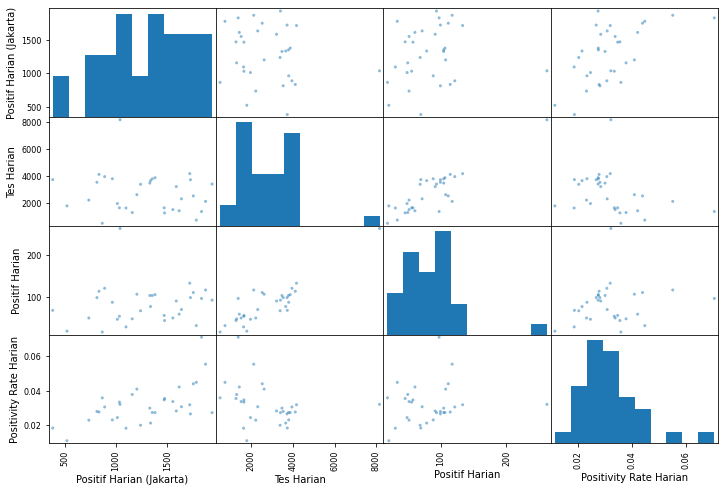

In [71]:
# Membuat plot matriks korelasi
from pandas.plotting import scatter_matrix
scatter_matrix(fin_data_ag, figsize=(12,8))

In [72]:
# Melihat Nilai korelasi berdasarkan data Positif Harian Jakarta
corr_matrix_tpj['Positif Harian (Jakarta)'].sort_values(ascending = False)

Positif Harian (Jakarta)    1.000000
Positivity Rate Harian      0.588750
Positif Harian              0.135881
Tes Harian                 -0.156879
Name: Positif Harian (Jakarta), dtype: float64

Melihat dari Nilai Korelasi terhadap data Positif Harian (Jakarta) kami dapat mengetahui bahwa data yang paling mempengaruhi **laju pertumbuhan** adalah data **Positivity Rate Harian**. Hal ini dapat kami lihat juga dalam scatter plot yang telah dibuat.

## Matriks Korelasi Data Vaksinasi Jakarta 5 Maret 2021 - 5 April 2021

#### Mengimport Data

In [73]:
# Memanggil Data dan menyimpan data
data_vaksinasi = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name='Vaksinasi')
data_vaksinasi

,Sasaran Total Indonesia: 181.554.465,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,Sasaran Total DKI Jakarta: 8.815.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tanggal,DKI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Tenaga Kesehatan,NaN,NaN,NaN,NaN,Lansia,NaN,NaN,NaN,...,Pelayan Publik,NaN,NaN,NaN,NaN,Total,NaN,NaN,NaN,NaN
3,NaN,Target Vaksinasi,Vaksinasi 1,Vaksinasi 2,Persentase 1,Persentase 2,Target Vaksinasi,Vaksinasi 1,Vaksinasi 2,Persentase 1,...,Target Vaksinasi,Vaksinasi 1,Vaksinasi 2,Persentase 1,Persentase 2,Target Vaksinasi,Vaksinasi 1,Vaksinasi 2,Persentase 1,Persentase 2
4,5 Maret 2021,112301,141425,91078,1.25934,0.811017,911631,76451,0,0.0838618,...,17327169,541888,2597,0.0312739,0.00014988,40349051,2413615,1114537,0.0598184,0.0276224
5,6 Maret 2021,112301,144046,91379,1.28268,0.813697,911631,79421,0,0.0871197,...,17327169,604456,4169,0.0348849,0.000240605,40349051,2552265,1130524,0.0632546,0.0280186
6,7 Maret 2021,112301,177126,91460,1.57724,0.814418,911631,83628,0,0.0917345,...,17327169,623474,4445,0.0359825,0.000256534,40349051,2888757,1133787,0.0715942,0.0280995
7,8 Maret 2021,112301,181237,92988,1.61385,0.828025,911631,95140,1,0.104362,...,17327169,715767,8880,0.0413089,0.00051249,40349051,3098025,1158432,0.0767806,0.0287103
8,9 Maret 2021,112301,113326,89984,1.00913,0.801275,911631,135128,675,0.148227,...,17327169,1510937,68527,0.0872005,0.00395489,40349051,3337026,1197772,0.082704,0.0296853
9,10 Maret 2021,112301,116791,90681,1.03998,0.807482,911631,154251,1100,0.169203,...,17327169,1682896,119495,0.0971247,0.00689639,40349051,3572519,1249822,0.0885403,0.0309753


#### Menyiapkan Data

Sama seperti langkah sebelumnya, pada tahap ini kami mengolah data sebelum membuat matriks korelasi.

In [74]:
# Melihat index data pada tanggal 5 Maret 2021
from_5_maret_dv = data_vaksinasi.loc[data_vaksinasi['Sasaran Total Indonesia: 181.554.465']=='5 Maret 2021']
index_5mar_dv = from_5_maret_dv.index[0]
index_5mar_dv

4

In [75]:
# Melihat index data pada tanggal 5 April 2021
date_5_april_dv = data_vaksinasi.loc[data_vaksinasi['Sasaran Total Indonesia: 181.554.465']==datetime.datetime(2021, 4, 5, 0, 0)]
index_5apr_dv = date_5_april_dv.index[0]
index_5apr_dv

35

In [76]:
# Rename beberapa columns yang diperlukan
data_vaksinasi_jak = data_vaksinasi.rename(columns={'Unnamed: 2' : 'Vaksinasi 1(Tenaga Kesehatan)', 
                                   'Unnamed: 3' : 'Vaksinasi 2(Tenaga Kesehatan)', 
                                   'Unnamed: 4' : 'Persentase 1(Tenaga Kesehatan)', 
                                   'Unnamed: 5' : 'Persentase 2(Tenaga Kesehatan)', 
                                   'Unnamed: 7' : 'Vaksinasi 1(Lansia)', 
                                   'Unnamed: 8' : 'Vaksinasi 2(Lansia)', 
                                   'Unnamed: 9' : 'Persentase 1(Lansia)', 
                                   'Unnamed: 10' : 'Persentase 2(Lansia)', 
                                   'Unnamed: 12' : 'Vaksinasi 1(Pelayan Publik)', 
                                   'Unnamed: 13' : 'Vaksinasi 2(Pelayan Publik)', 
                                   'Unnamed: 14' : 'Persentase 1(Pelayan Publik)', 
                                   'Unnamed: 15' : 'Persentase 2(Pelayan Publik)', 
                                   'Unnamed: 17' : 'Vaksinasi 1(Total)', 
                                   'Unnamed: 18' : 'Vaksinasi 2(Total)', 
                                   'Unnamed: 19' : 'Persentase 1(Total)', 
                                   'Unnamed: 20' : 'Persentase 2(Total)'})

In [77]:
data_vaksinasi_jak

,Sasaran Total Indonesia: 181.554.465,Unnamed: 1,Vaksinasi 1(Tenaga Kesehatan),Vaksinasi 2(Tenaga Kesehatan),Persentase 1(Tenaga Kesehatan),Persentase 2(Tenaga Kesehatan),Unnamed: 6,Vaksinasi 1(Lansia),Vaksinasi 2(Lansia),Persentase 1(Lansia),...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,Sasaran Total DKI Jakarta: 8.815.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tanggal,DKI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Tenaga Kesehatan,NaN,NaN,NaN,NaN,Lansia,NaN,NaN,NaN,...,Pelayan Publik,NaN,NaN,NaN,NaN,Total,NaN,NaN,NaN,NaN
3,NaN,Target Vaksinasi,Vaksinasi 1,Vaksinasi 2,Persentase 1,Persentase 2,Target Vaksinasi,Vaksinasi 1,Vaksinasi 2,Persentase 1,...,Target Vaksinasi,Vaksinasi 1,Vaksinasi 2,Persentase 1,Persentase 2,Target Vaksinasi,Vaksinasi 1,Vaksinasi 2,Persentase 1,Persentase 2
4,5 Maret 2021,112301,141425,91078,1.25934,0.811017,911631,76451,0,0.0838618,...,17327169,541888,2597,0.0312739,0.00014988,40349051,2413615,1114537,0.0598184,0.0276224
5,6 Maret 2021,112301,144046,91379,1.28268,0.813697,911631,79421,0,0.0871197,...,17327169,604456,4169,0.0348849,0.000240605,40349051,2552265,1130524,0.0632546,0.0280186
6,7 Maret 2021,112301,177126,91460,1.57724,0.814418,911631,83628,0,0.0917345,...,17327169,623474,4445,0.0359825,0.000256534,40349051,2888757,1133787,0.0715942,0.0280995
7,8 Maret 2021,112301,181237,92988,1.61385,0.828025,911631,95140,1,0.104362,...,17327169,715767,8880,0.0413089,0.00051249,40349051,3098025,1158432,0.0767806,0.0287103
8,9 Maret 2021,112301,113326,89984,1.00913,0.801275,911631,135128,675,0.148227,...,17327169,1510937,68527,0.0872005,0.00395489,40349051,3337026,1197772,0.082704,0.0296853
9,10 Maret 2021,112301,116791,90681,1.03998,0.807482,911631,154251,1100,0.169203,...,17327169,1682896,119495,0.0971247,0.00689639,40349051,3572519,1249822,0.0885403,0.0309753


In [78]:
# Mengambil data berdasarkan tanggal yang diperlukan
data_vaksinasi_jak = data_vaksinasi_jak.loc[index_5mar_dv:index_5apr_dv]
data_vaksinasi_jak

,Sasaran Total Indonesia: 181.554.465,Unnamed: 1,Vaksinasi 1(Tenaga Kesehatan),Vaksinasi 2(Tenaga Kesehatan),Persentase 1(Tenaga Kesehatan),Persentase 2(Tenaga Kesehatan),Unnamed: 6,Vaksinasi 1(Lansia),Vaksinasi 2(Lansia),Persentase 1(Lansia),...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
4,5 Maret 2021,112301,141425,91078,1.25934,0.811017,911631,76451,0,0.0838618,...,17327169,541888,2597,0.0312739,0.00014988,40349051,2413615,1114537,0.0598184,0.0276224
5,6 Maret 2021,112301,144046,91379,1.28268,0.813697,911631,79421,0,0.0871197,...,17327169,604456,4169,0.0348849,0.000240605,40349051,2552265,1130524,0.0632546,0.0280186
6,7 Maret 2021,112301,177126,91460,1.57724,0.814418,911631,83628,0,0.0917345,...,17327169,623474,4445,0.0359825,0.000256534,40349051,2888757,1133787,0.0715942,0.0280995
7,8 Maret 2021,112301,181237,92988,1.61385,0.828025,911631,95140,1,0.104362,...,17327169,715767,8880,0.0413089,0.00051249,40349051,3098025,1158432,0.0767806,0.0287103
8,9 Maret 2021,112301,113326,89984,1.00913,0.801275,911631,135128,675,0.148227,...,17327169,1510937,68527,0.0872005,0.00395489,40349051,3337026,1197772,0.082704,0.0296853
9,10 Maret 2021,112301,116791,90681,1.03998,0.807482,911631,154251,1100,0.169203,...,17327169,1682896,119495,0.0971247,0.00689639,40349051,3572519,1249822,0.0885403,0.0309753
10,11 Maret 2021,112301,116823,90693,1.04027,0.807589,911631,154915,1103,0.169932,...,17327169,1767209,144689,0.101991,0.00835041,40349051,3696059,1295615,0.0916021,0.0321102
11,12 Maret 2021,112301,118086,91521,1.05151,0.814962,911631,167086,1291,0.183282,...,17327169,1767209,144689,0.101991,0.00835041,40349051,3696059,1295615,0.0916021,0.0321102
12,13 Maret 2021,112301,118283,91748,1.05327,0.816983,911631,174327,1444,0.191225,...,17327169,1947195,278954,0.112378,0.0160992,40349051,3985596,1454836,0.0987779,0.0360563
13,14 Maret 2021,112301,118301,91764,1.05343,0.817125,911631,179024,1444,0.196378,...,17327169,1967948,282844,0.113576,0.0163237,40349051,4020124,1460222,0.0996337,0.0361897


In [79]:
# Membuang beberapa data yang tidak diperlukan
final_data_vak_jak = data_vaksinasi_jak.loc[:,['Vaksinasi 1(Tenaga Kesehatan)', 'Vaksinasi 2(Tenaga Kesehatan)', 
                            'Persentase 1(Tenaga Kesehatan)',  'Persentase 2(Tenaga Kesehatan)', 
                            'Vaksinasi 1(Lansia)', 'Vaksinasi 2(Lansia)', 
                            'Persentase 1(Lansia)', 'Persentase 2(Lansia)', 
                            'Vaksinasi 1(Pelayan Publik)', 'Vaksinasi 2(Pelayan Publik)', 
                            'Persentase 1(Pelayan Publik)', 'Persentase 2(Pelayan Publik)',
                            'Vaksinasi 1(Total)', 'Vaksinasi 2(Total)', 
                            'Persentase 1(Total)', 'Persentase 2(Total)']]
final_data_vak_jak

,Vaksinasi 1(Tenaga Kesehatan),Vaksinasi 2(Tenaga Kesehatan),Persentase 1(Tenaga Kesehatan),Persentase 2(Tenaga Kesehatan),Vaksinasi 1(Lansia),Vaksinasi 2(Lansia),Persentase 1(Lansia),Persentase 2(Lansia),Vaksinasi 1(Pelayan Publik),Vaksinasi 2(Pelayan Publik),Persentase 1(Pelayan Publik),Persentase 2(Pelayan Publik),Vaksinasi 1(Total),Vaksinasi 2(Total),Persentase 1(Total),Persentase 2(Total)
4,141425,91078,1.25934,0.811017,76451,0,0.0838618,0,64121,0,0.0324375,0,281997,91078,0.0939774,0.0303524
5,144046,91379,1.28268,0.813697,79421,0,0.0871197,0,66484,0,0.0336329,0,289951,91379,0.0966281,0.0304527
6,177126,91460,1.57724,0.814418,83628,0,0.0917345,0,73752,2514,0.0373096,0.00127178,334506,93974,0.111476,0.0313175
7,181237,92988,1.61385,0.828025,95140,1,0.104362,1.09694e-06,85333,3989,0.0431682,0.00201795,361710,96978,0.120542,0.0323186
8,113326,89984,1.00913,0.801275,135128,675,0.148227,0.000740431,174685,29195,0.0883695,0.0147691,423139,119854,0.141014,0.0399422
9,116791,90681,1.03998,0.807482,154251,1100,0.169203,0.00120663,202452,17773,0.102416,0.00899099,473494,109554,0.157795,0.0365096
10,116823,90693,1.04027,0.807589,154915,1103,0.169932,0.00120992,211754,17903,0.107122,0.00905675,483492,109699,0.161127,0.0365579
11,118086,91521,1.05151,0.814962,167086,1291,0.183282,0.00141614,234403,20226,0.11858,0.0102319,519575,113038,0.173152,0.0376707
12,118283,91748,1.05327,0.816983,174327,1444,0.191225,0.00158397,245355,21272,0.12412,0.0107611,537965,114464,0.17928,0.0381459
13,118301,91764,1.05343,0.817125,179024,1444,0.196378,0.00158397,252763,21413,0.127868,0.0108324,550088,114621,0.183321,0.0381982


In [80]:
final_data_vak_jak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 4 to 35
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Vaksinasi 1(Tenaga Kesehatan)   32 non-null     object
 1   Vaksinasi 2(Tenaga Kesehatan)   32 non-null     object
 2   Persentase 1(Tenaga Kesehatan)  32 non-null     object
 3   Persentase 2(Tenaga Kesehatan)  32 non-null     object
 4   Vaksinasi 1(Lansia)             32 non-null     object
 5   Vaksinasi 2(Lansia)             32 non-null     object
 6   Persentase 1(Lansia)            32 non-null     object
 7   Persentase 2(Lansia)            32 non-null     object
 8   Vaksinasi 1(Pelayan Publik)     32 non-null     object
 9   Vaksinasi 2(Pelayan Publik)     32 non-null     object
 10  Persentase 1(Pelayan Publik)    32 non-null     object
 11  Persentase 2(Pelayan Publik)    32 non-null     object
 12  Vaksinasi 1(Total)              32 non-null     obje

In [81]:
# Mengubah type data menjadi int
final_data_vak_jak['Vaksinasi 1(Tenaga Kesehatan)'] = final_data_vak_jak['Vaksinasi 1(Tenaga Kesehatan)'].astype(int)
final_data_vak_jak['Vaksinasi 2(Tenaga Kesehatan)'] = final_data_vak_jak['Vaksinasi 2(Tenaga Kesehatan)'].astype(int)
final_data_vak_jak['Vaksinasi 1(Lansia)'] = final_data_vak_jak['Vaksinasi 1(Lansia)'].astype(int)
final_data_vak_jak['Vaksinasi 2(Lansia)'] = final_data_vak_jak['Vaksinasi 2(Lansia)'].astype(int)
final_data_vak_jak['Vaksinasi 1(Pelayan Publik)'] = final_data_vak_jak['Vaksinasi 1(Pelayan Publik)'].astype(int)
final_data_vak_jak['Vaksinasi 2(Pelayan Publik)'] = final_data_vak_jak['Vaksinasi 2(Pelayan Publik)'].astype(int)
final_data_vak_jak['Vaksinasi 1(Total)'] = final_data_vak_jak['Vaksinasi 1(Total)'].astype(int)
final_data_vak_jak['Vaksinasi 2(Total)'] = final_data_vak_jak['Vaksinasi 2(Total)'].astype(int)
final_data_vak_jak

,Vaksinasi 1(Tenaga Kesehatan),Vaksinasi 2(Tenaga Kesehatan),Persentase 1(Tenaga Kesehatan),Persentase 2(Tenaga Kesehatan),Vaksinasi 1(Lansia),Vaksinasi 2(Lansia),Persentase 1(Lansia),Persentase 2(Lansia),Vaksinasi 1(Pelayan Publik),Vaksinasi 2(Pelayan Publik),Persentase 1(Pelayan Publik),Persentase 2(Pelayan Publik),Vaksinasi 1(Total),Vaksinasi 2(Total),Persentase 1(Total),Persentase 2(Total)
4,141425,91078,1.25934,0.811017,76451,0,0.0838618,0,64121,0,0.0324375,0,281997,91078,0.0939774,0.0303524
5,144046,91379,1.28268,0.813697,79421,0,0.0871197,0,66484,0,0.0336329,0,289951,91379,0.0966281,0.0304527
6,177126,91460,1.57724,0.814418,83628,0,0.0917345,0,73752,2514,0.0373096,0.00127178,334506,93974,0.111476,0.0313175
7,181237,92988,1.61385,0.828025,95140,1,0.104362,1.09694e-06,85333,3989,0.0431682,0.00201795,361710,96978,0.120542,0.0323186
8,113326,89984,1.00913,0.801275,135128,675,0.148227,0.000740431,174685,29195,0.0883695,0.0147691,423139,119854,0.141014,0.0399422
9,116791,90681,1.03998,0.807482,154251,1100,0.169203,0.00120663,202452,17773,0.102416,0.00899099,473494,109554,0.157795,0.0365096
10,116823,90693,1.04027,0.807589,154915,1103,0.169932,0.00120992,211754,17903,0.107122,0.00905675,483492,109699,0.161127,0.0365579
11,118086,91521,1.05151,0.814962,167086,1291,0.183282,0.00141614,234403,20226,0.11858,0.0102319,519575,113038,0.173152,0.0376707
12,118283,91748,1.05327,0.816983,174327,1444,0.191225,0.00158397,245355,21272,0.12412,0.0107611,537965,114464,0.17928,0.0381459
13,118301,91764,1.05343,0.817125,179024,1444,0.196378,0.00158397,252763,21413,0.127868,0.0108324,550088,114621,0.183321,0.0381982


In [82]:
final_data_vak_jak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 4 to 35
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Vaksinasi 1(Tenaga Kesehatan)   32 non-null     int32 
 1   Vaksinasi 2(Tenaga Kesehatan)   32 non-null     int32 
 2   Persentase 1(Tenaga Kesehatan)  32 non-null     object
 3   Persentase 2(Tenaga Kesehatan)  32 non-null     object
 4   Vaksinasi 1(Lansia)             32 non-null     int32 
 5   Vaksinasi 2(Lansia)             32 non-null     int32 
 6   Persentase 1(Lansia)            32 non-null     object
 7   Persentase 2(Lansia)            32 non-null     object
 8   Vaksinasi 1(Pelayan Publik)     32 non-null     int32 
 9   Vaksinasi 2(Pelayan Publik)     32 non-null     int32 
 10  Persentase 1(Pelayan Publik)    32 non-null     object
 11  Persentase 2(Pelayan Publik)    32 non-null     object
 12  Vaksinasi 1(Total)              32 non-null     int3

In [83]:
# Mengubah type data menjadi float
final_data_vak_jak['Persentase 1(Tenaga Kesehatan)'] = final_data_vak_jak['Persentase 1(Tenaga Kesehatan)'].astype('float64')
final_data_vak_jak['Persentase 2(Tenaga Kesehatan)'] = final_data_vak_jak['Persentase 2(Tenaga Kesehatan)'].astype('float64')
final_data_vak_jak['Persentase 1(Lansia)'] = final_data_vak_jak['Persentase 1(Lansia)'].astype('float64')
final_data_vak_jak['Persentase 2(Lansia)'] = final_data_vak_jak['Persentase 2(Lansia)'].astype('float64')
final_data_vak_jak['Persentase 1(Pelayan Publik)'] = final_data_vak_jak['Persentase 1(Pelayan Publik)'].astype('float64')
final_data_vak_jak['Persentase 2(Pelayan Publik)'] = final_data_vak_jak['Persentase 2(Pelayan Publik)'].astype('float64')
final_data_vak_jak['Persentase 1(Total)'] = final_data_vak_jak['Persentase 1(Total)'].astype('float64')
final_data_vak_jak['Persentase 2(Total)'] = final_data_vak_jak['Persentase 2(Total)'].astype('float64')
final_data_vak_jak

,Vaksinasi 1(Tenaga Kesehatan),Vaksinasi 2(Tenaga Kesehatan),Persentase 1(Tenaga Kesehatan),Persentase 2(Tenaga Kesehatan),Vaksinasi 1(Lansia),Vaksinasi 2(Lansia),Persentase 1(Lansia),Persentase 2(Lansia),Vaksinasi 1(Pelayan Publik),Vaksinasi 2(Pelayan Publik),Persentase 1(Pelayan Publik),Persentase 2(Pelayan Publik),Vaksinasi 1(Total),Vaksinasi 2(Total),Persentase 1(Total),Persentase 2(Total)
4,141425,91078,1.259339,0.811017,76451,0,0.083862,0.000000,64121,0,0.032437,0.000000,281997,91078,0.093977,0.030352
5,144046,91379,1.282678,0.813697,79421,0,0.087120,0.000000,66484,0,0.033633,0.000000,289951,91379,0.096628,0.030453
6,177126,91460,1.577243,0.814418,83628,0,0.091734,0.000000,73752,2514,0.037310,0.001272,334506,93974,0.111476,0.031317
7,181237,92988,1.613850,0.828025,95140,1,0.104362,0.000001,85333,3989,0.043168,0.002018,361710,96978,0.120542,0.032319
8,113326,89984,1.009127,0.801275,135128,675,0.148227,0.000740,174685,29195,0.088369,0.014769,423139,119854,0.141014,0.039942
9,116791,90681,1.039982,0.807482,154251,1100,0.169203,0.001207,202452,17773,0.102416,0.008991,473494,109554,0.157795,0.036510
10,116823,90693,1.040267,0.807589,154915,1103,0.169932,0.001210,211754,17903,0.107122,0.009057,483492,109699,0.161127,0.036558
11,118086,91521,1.051513,0.814962,167086,1291,0.183282,0.001416,234403,20226,0.118580,0.010232,519575,113038,0.173152,0.037671
12,118283,91748,1.053268,0.816983,174327,1444,0.191225,0.001584,245355,21272,0.124120,0.010761,537965,114464,0.179280,0.038146
13,118301,91764,1.053428,0.817125,179024,1444,0.196378,0.001584,252763,21413,0.127868,0.010832,550088,114621,0.183321,0.038198


In [84]:
# Memastikan bahwa type data benar-benar terubah
final_data_vak_jak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 4 to 35
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Vaksinasi 1(Tenaga Kesehatan)   32 non-null     int32  
 1   Vaksinasi 2(Tenaga Kesehatan)   32 non-null     int32  
 2   Persentase 1(Tenaga Kesehatan)  32 non-null     float64
 3   Persentase 2(Tenaga Kesehatan)  32 non-null     float64
 4   Vaksinasi 1(Lansia)             32 non-null     int32  
 5   Vaksinasi 2(Lansia)             32 non-null     int32  
 6   Persentase 1(Lansia)            32 non-null     float64
 7   Persentase 2(Lansia)            32 non-null     float64
 8   Vaksinasi 1(Pelayan Publik)     32 non-null     int32  
 9   Vaksinasi 2(Pelayan Publik)     32 non-null     int32  
 10  Persentase 1(Pelayan Publik)    32 non-null     float64
 11  Persentase 2(Pelayan Publik)    32 non-null     float64
 12  Vaksinasi 1(Total)              32 non

In [85]:
#Mereset index dari kedua data sebelum digabungkan dengan data Positif Harian Jakarta
final_data_vak_jak = final_data_vak_jak.reset_index(drop=True)

In [86]:
#Menggabungkan data positif harian dengan RDT Ag Jakarta
fin_data_vj = pd.concat([final_data_vak_jak, data_pos_har_jak_5_mar_apr], axis = 1)
fin_data_vj

,Vaksinasi 1(Tenaga Kesehatan),Vaksinasi 2(Tenaga Kesehatan),Persentase 1(Tenaga Kesehatan),Persentase 2(Tenaga Kesehatan),Vaksinasi 1(Lansia),Vaksinasi 2(Lansia),Persentase 1(Lansia),Persentase 2(Lansia),Vaksinasi 1(Pelayan Publik),Vaksinasi 2(Pelayan Publik),Persentase 1(Pelayan Publik),Persentase 2(Pelayan Publik),Vaksinasi 1(Total),Vaksinasi 2(Total),Persentase 1(Total),Persentase 2(Total),Positif Harian (Jakarta)
0,141425,91078,1.259339,0.811017,76451,0,0.083862,0.000000,64121,0,0.032437,0.000000,281997,91078,0.093977,0.030352,1159
1,144046,91379,1.282678,0.813697,79421,0,0.087120,0.000000,66484,0,0.033633,0.000000,289951,91379,0.096628,0.030453,1616
2,177126,91460,1.577243,0.814418,83628,0,0.091734,0.000000,73752,2514,0.037310,0.001272,334506,93974,0.111476,0.031317,1834
3,181237,92988,1.613850,0.828025,95140,1,0.104362,0.000001,85333,3989,0.043168,0.002018,361710,96978,0.120542,0.032319,1783
4,113326,89984,1.009127,0.801275,135128,675,0.148227,0.000740,174685,29195,0.088369,0.014769,423139,119854,0.141014,0.039942,867
5,116791,90681,1.039982,0.807482,154251,1100,0.169203,0.001207,202452,17773,0.102416,0.008991,473494,109554,0.157795,0.036510,1040
6,116823,90693,1.040267,0.807589,154915,1103,0.169932,0.001210,211754,17903,0.107122,0.009057,483492,109699,0.161127,0.036558,1754
7,118086,91521,1.051513,0.814962,167086,1291,0.183282,0.001416,234403,20226,0.118580,0.010232,519575,113038,0.173152,0.037671,1873
8,118283,91748,1.053268,0.816983,174327,1444,0.191225,0.001584,245355,21272,0.124120,0.010761,537965,114464,0.179280,0.038146,1034
9,118301,91764,1.053428,0.817125,179024,1444,0.196378,0.001584,252763,21413,0.127868,0.010832,550088,114621,0.183321,0.038198,1204


#### Membuat Matriks Korelasi

Setelah mengolah data, kami akan mulai dengan membuat matriks korelasi. Dapat kami lihat dibawah ini masing-masing nilai korelasi suatu fitur terhadap fitur lainnya pada data Vaksinasi. Nilai negatif pada nilai korelasi berarti bahwa data tersebut memiliki pengaruh dengan arah yang terbalik dibandingkan dengan data lainnya.

In [87]:
# Membuat matriks korelasi
corr_matrix_dvj = fin_data_vj.corr()
corr_matrix_dvj 

,Vaksinasi 1(Tenaga Kesehatan),Vaksinasi 2(Tenaga Kesehatan),Persentase 1(Tenaga Kesehatan),Persentase 2(Tenaga Kesehatan),Vaksinasi 1(Lansia),Vaksinasi 2(Lansia),Persentase 1(Lansia),Persentase 2(Lansia),Vaksinasi 1(Pelayan Publik),Vaksinasi 2(Pelayan Publik),Persentase 1(Pelayan Publik),Persentase 2(Pelayan Publik),Vaksinasi 1(Total),Vaksinasi 2(Total),Persentase 1(Total),Persentase 2(Total),Positif Harian (Jakarta)
Vaksinasi 1(Tenaga Kesehatan),1.000000,-0.224281,1.000000,-0.224281,-0.385786,-0.157160,-0.385786,-0.157160,-0.420066,-0.272367,-0.420066,-0.272367,-0.371370,-0.249785,-0.371370,-0.249785,0.328659
Vaksinasi 2(Tenaga Kesehatan),-0.224281,1.000000,-0.224281,1.000000,0.971087,0.842915,0.971087,0.842915,0.959770,0.973550,0.959770,0.973550,0.972078,0.961342,0.972078,0.961342,-0.353885
Persentase 1(Tenaga Kesehatan),1.000000,-0.224281,1.000000,-0.224281,-0.385786,-0.157160,-0.385786,-0.157160,-0.420066,-0.272367,-0.420066,-0.272367,-0.371370,-0.249785,-0.371370,-0.249785,0.328659
Persentase 2(Tenaga Kesehatan),-0.224281,1.000000,-0.224281,1.000000,0.971087,0.842915,0.971087,0.842915,0.959770,0.973550,0.959770,0.973550,0.972078,0.961342,0.972078,0.961342,-0.353885
Vaksinasi 1(Lansia),-0.385786,0.971087,-0.385786,0.971087,1.000000,0.836223,1.000000,0.836223,0.993989,0.978616,0.993989,0.978616,0.997921,0.962619,0.997921,0.962619,-0.423823
Vaksinasi 2(Lansia),-0.157160,0.842915,-0.157160,0.842915,0.836223,1.000000,0.836223,1.000000,0.858266,0.918377,0.858266,0.918377,0.858148,0.947220,0.858148,0.947220,-0.512772
Persentase 1(Lansia),-0.385786,0.971087,-0.385786,0.971087,1.000000,0.836223,1.000000,0.836223,0.993989,0.978616,0.993989,0.978616,0.997921,0.962619,0.997921,0.962619,-0.423823
Persentase 2(Lansia),-0.157160,0.842915,-0.157160,0.842915,0.836223,1.000000,0.836223,1.000000,0.858266,0.918377,0.858266,0.918377,0.858148,0.947220,0.858148,0.947220,-0.512772
Vaksinasi 1(Pelayan Publik),-0.420066,0.959770,-0.420066,0.959770,0.993989,0.858266,0.993989,0.858266,1.000000,0.975122,1.000000,0.975122,0.997739,0.964286,0.997739,0.964286,-0.437271
Vaksinasi 2(Pelayan Publik),-0.272367,0.973550,-0.272367,0.973550,0.978616,0.918377,0.978616,0.918377,0.975122,1.000000,0.975122,1.000000,0.982512,0.996729,0.982512,0.996729,-0.464284


array([[<AxesSubplot:xlabel='Vaksinasi 1(Tenaga Kesehatan)', ylabel='Vaksinasi 1(Tenaga Kesehatan)'>,
        <AxesSubplot:xlabel='Vaksinasi 2(Tenaga Kesehatan)', ylabel='Vaksinasi 1(Tenaga Kesehatan)'>,
        <AxesSubplot:xlabel='Persentase 1(Tenaga Kesehatan)', ylabel='Vaksinasi 1(Tenaga Kesehatan)'>,
        <AxesSubplot:xlabel='Persentase 2(Tenaga Kesehatan)', ylabel='Vaksinasi 1(Tenaga Kesehatan)'>,
        <AxesSubplot:xlabel='Vaksinasi 1(Lansia)', ylabel='Vaksinasi 1(Tenaga Kesehatan)'>,
        <AxesSubplot:xlabel='Vaksinasi 2(Lansia)', ylabel='Vaksinasi 1(Tenaga Kesehatan)'>,
        <AxesSubplot:xlabel='Persentase 1(Lansia)', ylabel='Vaksinasi 1(Tenaga Kesehatan)'>,
        <AxesSubplot:xlabel='Persentase 2(Lansia)', ylabel='Vaksinasi 1(Tenaga Kesehatan)'>,
        <AxesSubplot:xlabel='Vaksinasi 1(Pelayan Publik)', ylabel='Vaksinasi 1(Tenaga Kesehatan)'>,
        <AxesSubplot:xlabel='Vaksinasi 2(Pelayan Publik)', ylabel='Vaksinasi 1(Tenaga Kesehatan)'>,
        <AxesSubplot

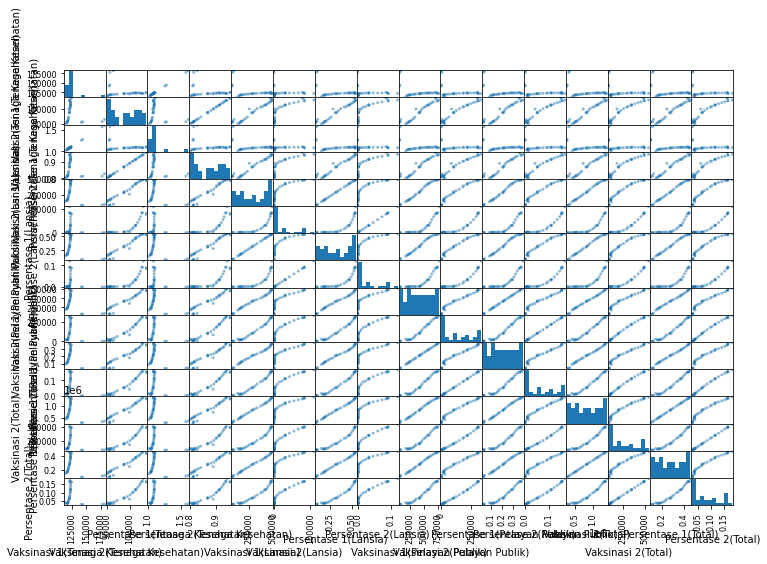

In [88]:
# Membuat plot matriks korelasi
scatter_matrix(final_data_vak_jak, figsize=(12,8))

In [89]:
# Melihat Nilai korelasi berdasarkan data Positif Harian Jakarta
corr_matrix_dvj['Positif Harian (Jakarta)'].sort_values(ascending = False)

Positif Harian (Jakarta)          1.000000
Persentase 1(Tenaga Kesehatan)    0.328659
Vaksinasi 1(Tenaga Kesehatan)     0.328659
Persentase 2(Tenaga Kesehatan)   -0.353885
Vaksinasi 2(Tenaga Kesehatan)    -0.353885
Persentase 1(Lansia)             -0.423823
Vaksinasi 1(Lansia)              -0.423823
Persentase 1(Total)              -0.425769
Vaksinasi 1(Total)               -0.425769
Persentase 1(Pelayan Publik)     -0.437271
Vaksinasi 1(Pelayan Publik)      -0.437271
Vaksinasi 2(Pelayan Publik)      -0.464284
Persentase 2(Pelayan Publik)     -0.464284
Vaksinasi 2(Total)               -0.477607
Persentase 2(Total)              -0.477607
Vaksinasi 2(Lansia)              -0.512772
Persentase 2(Lansia)             -0.512772
Name: Positif Harian (Jakarta), dtype: float64

Melihat dari Nilai Korelasi data diatas terhadap data Positif Harian (Jakarta) kita dapat mengetahui bahwa data yang paling mempengaruhi **laju pertumbuhan** adalah data **Persentase 2(Lansia)**. Arti nilai negatif yang dimiliki data tersebut berarti mempunyai pengaruh yang terbalik terhadap data Positif Harian (Jakarta).

In [90]:
# Convert final data ke csv agar mudah digunakan yang lainnya
fin_data_ag.to_csv("Final Data RDT Ag with Positif Harian Jakarta 5 Maret s.d. 5 April.csv")
fin_data_vj.to_csv("Final Data Vaksinasi Jakarta with Poisitif Harian Jakarta 5 Maret s.d. 5 April.csv")

# Proses Pemisahan data menjadi data uji

Dalam langkah-langkah selanjutnya kami membutuhkan data latih dan data uji untuk membuat model. Oleh karena itu, kami menambahkan beberapa data tambahan dari rentang tanggal 6 April sampai dengan 12 atau 13 April. Langkah-langkah pada tahap ini hanya mengolah data agar siap menjadi data uji yang dapat langsung digunakan.

In [91]:
# Mempersiapkan data untuk diambil dengan rentang waktu dari tanggal 6 April sampai 12 April
data_indjak = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name='Data Indonesia dan Jakarta')
data_rdtag= pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name='RDT Ag')
data_vksns = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name='Vaksinasi')

In [92]:
data_indjak.tail()

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),...,Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
402,2021-04-07,42064,1391742,113570,1547376,6391,375651,2814,3482,388338,...,87,5769,-996,4860,12,571,109,170,862,279
403,2021-04-08,42227,1399382,111271,1552880,6410,376270,3244,3653,389577,...,163,7640,-2299,5504,19,619,430,171,1239,601
404,2021-04-09,42348,1405679,110118,1558145,6424,376959,3506,3701,390590,...,121,6297,-1153,5265,14,689,262,48,1013,310
405,2021-04-10,42443,1409288,111137,1562868,6435,377797,3716,3619,391567,...,95,3609,1019,4723,11,838,210,-82,977,128
406,2021-04-11,42530,1414507,109958,1566995,6450,379210,3617,3321,392598,...,87,5219,-1179,4127,15,1413,-99,-298,1031,-397


In [93]:
# Menyiapkan index berdasarkan tanggal untuk setiap data
import datetime

#Untuk data Indonesia Jakarta
from6_indjak = data_indjak.loc[data['Tanggal']=='2021-04-06 00:00:00']
index_6indjak = from6_indjak.index[0]
from12_indjak = data_indjak.loc[data['Tanggal']=='2021-04-11 00:00:00'] ##9 DIGANTI YAAA
index_12indjak = from12_indjak.index[0]

#Untuk data RDT Ag
from6_rdt = data_rdtag.loc[data_rdtag['EIS']==datetime.datetime(2021, 4, 6, 0, 0)]
index_6rdt = from6_rdt.index[0]
from12_rdt = data_rdtag.loc[data_rdtag['EIS']==datetime.datetime(2021, 4, 11, 0, 0)] ##8 DIGANTI YAAA
index_12rdt = from12_rdt.index[0]

#Untuk data Vaksinasi
from6_vksns = data_vksns.loc[data_vksns['Sasaran Total Indonesia: 181.554.465'
                                           ]==datetime.datetime(2021, 4, 6, 0, 0)]
index_6vksns = from6_vksns.index[0]
from12_vksns = data_vksns.loc[data_vksns['Sasaran Total Indonesia: 181.554.465'
                                            ]==datetime.datetime(2021, 4, 11, 0, 0)]##8 DIGANTI YAAA
index_12vksns = from12_vksns.index[0]

#Cek setiap index berhasil di dapatkan
print("Index:\n6  April IND-JAK   =", index_6indjak,
     "\n12 April IND-JAK   =", index_12indjak,
     "\n6  April RDT Ag    =", index_6rdt,
     "\n12 April RDT Ag    =", index_12rdt,
     "\n6  April Vaksinasi =", index_6vksns,
     "\n12 April Vaksinasi =", index_12vksns,)

Index:
6  April IND-JAK   = 401 
12 April IND-JAK   = 406 
6  April RDT Ag    = 96 
12 April RDT Ag    = 101 
6  April Vaksinasi = 36 
12 April Vaksinasi = 41


In [94]:
#Mengambil data di antara 6 April hingga 12 April

data_indjak_6 = data_indjak[index_6indjak:index_12indjak+1]

data_rdt_6 = data_rdtag.loc[index_6rdt:index_12rdt]

data_vksns_6 = data_vksns.loc[index_6vksns:index_12vksns]

In [95]:
#Mengecek ukuran setiap data, harus sama
print("Shape IND-JAK   =", data_indjak_6.shape,    
     "\nShape RDT Ag    =", data_indjak_6.shape,     
     "\nShape Vaksinasi =", data_indjak_6.shape)

Shape IND-JAK   = (6, 21) 
Shape RDT Ag    = (6, 21) 
Shape Vaksinasi = (6, 21)


In [96]:
#Melakukan rename column index
data_rdt_6 = data_rdt_6.rename(columns={'Total DKI Jakarta': 'Tes Harian',
                                        'Unnamed: 15': 'Positif Harian', 
                                        'Unnamed: 17': 'Positivity Rate Harian'})

data_vksns_6 = data_vksns_6.rename(columns={'Unnamed: 2' : 'Vaksinasi 1(Tenaga Kesehatan)', 
                                            'Unnamed: 3' : 'Vaksinasi 2(Tenaga Kesehatan)', 
                                            'Unnamed: 4' : 'Persentase 1(Tenaga Kesehatan)', 
                                            'Unnamed: 5' : 'Persentase 2(Tenaga Kesehatan)', 
                                            'Unnamed: 7' : 'Vaksinasi 1(Lansia)', 
                                            'Unnamed: 8' : 'Vaksinasi 2(Lansia)', 
                                            'Unnamed: 9' : 'Persentase 1(Lansia)', 
                                            'Unnamed: 10' : 'Persentase 2(Lansia)', 
                                            'Unnamed: 12' : 'Vaksinasi 1(Pelayan Publik)', 
                                            'Unnamed: 13' : 'Vaksinasi 2(Pelayan Publik)', 
                                            'Unnamed: 14' : 'Persentase 1(Pelayan Publik)', 
                                            'Unnamed: 15' : 'Persentase 2(Pelayan Publik)', 
                                            'Unnamed: 17' : 'Vaksinasi 1(Total)', 
                                            'Unnamed: 18' : 'Vaksinasi 2(Total)', 
                                            'Unnamed: 19' : 'Persentase 1(Total)', 
                                            'Unnamed: 20' : 'Persentase 2(Total)'})

In [97]:
#Melakukan pengubahan tipe dari isi data

#Data RDT Ag
data_rdt_6['Tes Harian'] = pd.to_numeric(data_rdt_6['Tes Harian'])
data_rdt_6['Positif Harian'] = pd.to_numeric(data_rdt_6['Positif Harian'])
data_rdt_6['Positivity Rate Harian'] = pd.to_numeric(data_rdt_6['Positivity Rate Harian'])

#Data Vaksinasi
data_vksns_6['Vaksinasi 1(Tenaga Kesehatan)'] = data_vksns_6['Vaksinasi 1(Tenaga Kesehatan)'].astype(int)
data_vksns_6['Vaksinasi 2(Tenaga Kesehatan)'] = data_vksns_6['Vaksinasi 2(Tenaga Kesehatan)'].astype(int)
data_vksns_6['Vaksinasi 1(Lansia)'] = data_vksns_6['Vaksinasi 1(Lansia)'].astype(int)
data_vksns_6['Vaksinasi 2(Lansia)'] = data_vksns_6['Vaksinasi 2(Lansia)'].astype(int)
data_vksns_6['Vaksinasi 1(Pelayan Publik)'] = data_vksns_6['Vaksinasi 1(Pelayan Publik)'].astype(int)
data_vksns_6['Vaksinasi 2(Pelayan Publik)'] = data_vksns_6['Vaksinasi 2(Pelayan Publik)'].astype(int)
data_vksns_6['Vaksinasi 1(Total)'] = data_vksns_6['Vaksinasi 1(Total)'].astype(int)
data_vksns_6['Vaksinasi 2(Total)'] = data_vksns_6['Vaksinasi 2(Total)'].astype(int)
data_vksns_6['Persentase 1(Tenaga Kesehatan)'] = data_vksns_6['Persentase 1(Tenaga Kesehatan)'].astype('float64')
data_vksns_6['Persentase 2(Tenaga Kesehatan)'] = data_vksns_6['Persentase 2(Tenaga Kesehatan)'].astype('float64')
data_vksns_6['Persentase 1(Lansia)'] = data_vksns_6['Persentase 1(Lansia)'].astype('float64')
data_vksns_6['Persentase 2(Lansia)'] = data_vksns_6['Persentase 2(Lansia)'].astype('float64')
data_vksns_6['Persentase 1(Pelayan Publik)'] = data_vksns_6['Persentase 1(Pelayan Publik)'].astype('float64')
data_vksns_6['Persentase 2(Pelayan Publik)'] = data_vksns_6['Persentase 2(Pelayan Publik)'].astype('float64')
data_vksns_6['Persentase 1(Total)'] = data_vksns_6['Persentase 1(Total)'].astype('float64')
data_vksns_6['Persentase 2(Total)'] = data_vksns_6['Persentase 2(Total)'].astype('float64')

In [98]:
#Mengabil column yang perlu
indjak_only = data_indjak_6.loc[:,['Positif Harian (Jakarta)',]]
rdt_only = data_rdt_6.loc[:,['Tes Harian','Positif Harian', 'Positivity Rate Harian']]
vksns_only = data_vksns_6.loc[:,['Vaksinasi 1(Tenaga Kesehatan)', 'Vaksinasi 2(Tenaga Kesehatan)',
                                 'Persentase 1(Tenaga Kesehatan)',  'Persentase 2(Tenaga Kesehatan)',
                                 'Vaksinasi 1(Lansia)', 'Vaksinasi 2(Lansia)',
                                 'Persentase 1(Lansia)', 'Persentase 2(Lansia)',
                                 'Vaksinasi 1(Pelayan Publik)', 'Vaksinasi 2(Pelayan Publik)',
                                 'Persentase 1(Pelayan Publik)', 'Persentase 2(Pelayan Publik)',
                                 'Vaksinasi 1(Total)', 'Vaksinasi 2(Total)',
                                 'Persentase 1(Total)', 'Persentase 2(Total)']]

In [99]:
#Melakukan Reset index, bertujuan untuk penggabungan data memiliki index yang sama
indjak_only = indjak_only.reset_index(drop=True)
rdt_only = rdt_only.reset_index(drop=True)
vksns_only = vksns_only.reset_index(drop=True)

#Penggabungan data
data_test_rdt = pd.concat([indjak_only, rdt_only], axis = 1)
data_test_vksns = pd.concat([indjak_only,vksns_only], axis = 1)

In [100]:
data_test_rdt.to_csv('data_test_rdt.csv')
data_test_vksns.to_csv('data_test_vksns.csv')

# Langkah 3

Pada langkah 3, kami akan membuat model regresi data berdasarkan data yang telah diolah dari data Langkah 2 dengan menggunakan model Machine Learning.

## Data RDT Ag 

Memanggil data RDT Ag yang sudah tersimpan sebagai CSV, setelah itu hilangkan data yang tidak perlu (disini maksudnya menghilangkan kolom unnamed tambahan yang berupa index).

In [101]:
import pandas as pd
data_ag = pd.read_csv('Final Data RDT Ag with Positif Harian Jakarta 5 Maret s.d. 5 April.csv').iloc[:,1:]

In [102]:
xag_3 = data_ag['Positivity Rate Harian'].values.reshape(-1, 1)
y_3 = data_ag['Positif Harian (Jakarta)'].values

## Data Test RDT Ag

In [103]:
data_test_ag = pd.read_csv('data_test_rdt.csv').iloc[:,1:]

In [104]:
xag_test = data_test_ag['Positivity Rate Harian'].values.reshape(-1, 1)
yag_test = data_test_ag['Positif Harian (Jakarta)'].values

### Decision Tree Regressor Model

Pada tahap ini akan dilakukan model dengan metode Decision Tree Regressor.

In [105]:
#Pembuatan Model
from sklearn.tree import DecisionTreeRegressor

tree_reg3 = DecisionTreeRegressor(random_state=1, max_depth=3)

In [106]:
#Fitting X dan y
tree_reg3 = tree_reg3.fit(xag_3, y_3)
tree_reg3

DecisionTreeRegressor(max_depth=3, random_state=1)

In [107]:
#Melakukan prediction dan menyimpannya menggunakan "ypred_reg3"
ypred_reg3 = tree_reg3.predict(xag_test)

In [108]:
#Scoring
score3 = tree_reg3.score(xag_3, y_3)

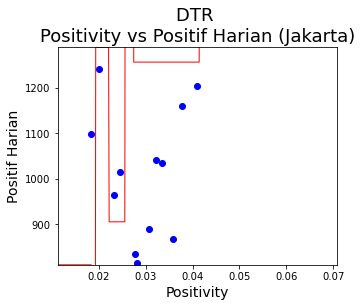

In [109]:
#Melakukan Plotting
import matplotlib.pyplot as plt
import numpy as np


def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.plot(X, y, "bo")
    plt.plot(x1, y_pred, "r-", linewidth=1,)
    
fig, axes = plt.subplots(ncols=1, figsize=(5, 4), sharey=True)
plot_regression_predictions(tree_reg3, xag_3, y_3, axes=[xag_3.min(), xag_3.max()
                                                         , ypred_reg3.min(), ypred_reg3.max()])
plt.title("DTR \nPositivity vs Positif Harian (Jakarta)", fontsize=18)
plt.xlabel("Positivity", fontsize = 14)
plt.ylabel("Positif Harian", fontsize = 14)

plt.show()

### Gradient Boost Model

In [110]:
#Membuat Model
from sklearn.ensemble import GradientBoostingRegressor

grdnreg = GradientBoostingRegressor(max_depth=4, n_estimators=10, learning_rate=0.1, random_state=1)

#fitting
grdnreg.fit(xag_3, y_3)

GradientBoostingRegressor(max_depth=4, n_estimators=10, random_state=1)

In [111]:
#Scoring
scoregrad = grdnreg.score(xag_3, y_3)

Text(0, 0.5, 'Positif Harian')

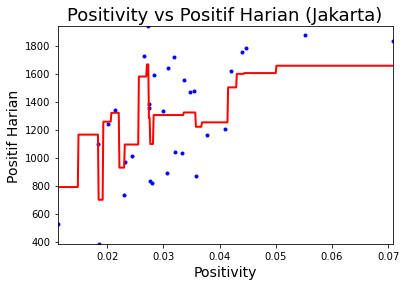

In [112]:
#Plotting
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    plt.axis(axes)

plot_predictions([grdnreg], xag_3, y_3, axes=[xag_3.min(), xag_3.max(), y_3.min(), y_3.max()], label="Ensemble predictions")
plt.title("Positivity vs Positif Harian (Jakarta)", fontsize=18)
plt.xlabel("Positivity", fontsize = 14)
plt.ylabel("Positif Harian", fontsize = 14)

### Random Forest Regression Model

In [113]:
#Pembuatan model
from sklearn.ensemble import RandomForestRegressor
rnd_clf = RandomForestRegressor(max_depth=3, random_state=0)
rnd_clf = rnd_clf.fit(xag_3, y_3)
rnd_clf

RandomForestRegressor(max_depth=3, random_state=0)

In [114]:
#Membuat prediksi
ypred_rndf3 = rnd_clf.predict(xag_test)

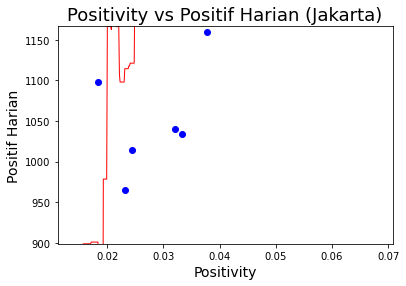

In [115]:
#Plotting

plot_regression_predictions(rnd_clf, xag_3, y_3, axes=[xag_3.min(), xag_3.max()
                                                         , ypred_rndf3.min(), ypred_rndf3.max()])
plt.title("Positivity vs Positif Harian (Jakarta)", fontsize=18)
plt.xlabel("Positivity", fontsize = 14)
plt.ylabel("Positif Harian", fontsize = 14)

plt.show()

In [116]:
#Scoring
scorerndf = rnd_clf.score(xag_3, y_3)

In [117]:
#Mencetak score untuk setipa model
print('Score Decision Tree Regressor=', score3, '\nScore Gradient Boost=', scoregrad, 
      '\nScore Random Forest Regressor=', scorerndf)

Score Decision Tree Regressor= 0.6753326577919533 
Score Gradient Boost= 0.7018586766476917 
Score Random Forest Regressor= 0.6338893429694301


#### Kesimpulan
Berdasarkan hasil yang didapat diatas, untuk perbandingan data  Positif Harian (Jakarta) dengan data RDT Ag, perolehan score Gradient Boost lebih baik dengan 0.70 dibandingkan dengan Decision Tree dengan score 0.675 dan Random Forest Regressor yang hanya 0.634. Dapat disimpulkan bahwa Gradient Boost lebih baik dari kedua tipe regressor lainnya yaitu Decision Tree Regressor dan Random Forest Regressor.

## Data Vaksinasi

In [118]:
data_vak = pd.read_csv('Final Data Vaksinasi Jakarta with Poisitif Harian Jakarta 5 Maret s.d. 5 April.csv').iloc[:,1:]

In [119]:
xvak_8 = data_vak['Persentase 2(Lansia)'].values.reshape(-1, 1)
y_vak = data_vak['Positif Harian (Jakarta)'].values

## Data Test Vaksinasi

In [120]:
data_test_vak = pd.read_csv('data_test_vksns.csv').iloc[:,1:]

In [121]:
xvak_test = data_test_vak['Persentase 2(Lansia)'].values.reshape(-1, 1)
y_test_vak = data_test_vak['Positif Harian (Jakarta)'].values

### Decision Tree Regressor Model

In [122]:
tree_reg8_vak = DecisionTreeRegressor(random_state=1, max_depth=3)
tree_reg8_vak

DecisionTreeRegressor(max_depth=3, random_state=1)

In [123]:
tree_reg8_vak = tree_reg8_vak.fit(xvak_8, y_vak)

In [124]:
ypred_reg8_vak = tree_reg8_vak.predict(xvak_test)

In [125]:
score8_vak = tree_reg8_vak.score(xvak_8, y_vak)

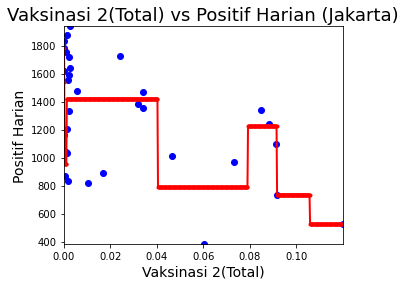

In [126]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.plot(X, y, "bo")
    plt.plot(x1, y_pred, "r.-", linewidth=2,)
    
fig, axes = plt.subplots(ncols=1, figsize=(5, 4), sharey=True)
plot_regression_predictions(tree_reg8_vak, xvak_8, y_vak, axes=[xvak_8.min(), xvak_8.max()
                                                         , y_vak.min(), y_vak.max()])
plt.title("Vaksinasi 2(Total) vs Positif Harian (Jakarta)", fontsize=18)
plt.xlabel("Vaksinasi 2(Total)", fontsize = 14)
plt.ylabel("Positif Harian", fontsize = 14)

plt.show()

### Gradient Boost Model

In [127]:
grdnreg_vak = GradientBoostingRegressor(max_depth=4, n_estimators=10, learning_rate=0.1, random_state=1)
grdnreg_vak.fit(xvak_8, y_vak)

GradientBoostingRegressor(max_depth=4, n_estimators=10, random_state=1)

In [128]:
scoregrad_vak = grdnreg.score(xvak_8, y_vak)

Text(0, 0.5, 'Positif Harian (Jakarta)')

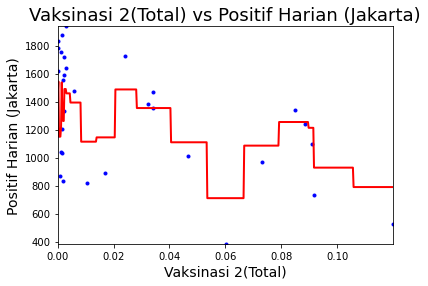

In [129]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    plt.axis(axes)


plot_predictions([grdnreg_vak], xvak_8, y_vak, axes=[xvak_8.min(), xvak_8.max(), y_vak.min(), y_vak.max()], label="Ensemble predictions")

plt.title("Vaksinasi 2(Total) vs Positif Harian (Jakarta)", fontsize=18)
plt.xlabel("Vaksinasi 2(Total)", fontsize = 14)
plt.ylabel("Positif Harian (Jakarta)", fontsize = 14)

### Random Forest Regression Model

In [130]:
rnd_clf_vak = RandomForestRegressor(max_depth=3, random_state=0)
rnd_clf_vak = rnd_clf_vak.fit(xvak_8, y_vak)
rnd_clf_vak

RandomForestRegressor(max_depth=3, random_state=0)

In [131]:
ypred_rndf8_vak = rnd_clf_vak.predict(xvak_test)

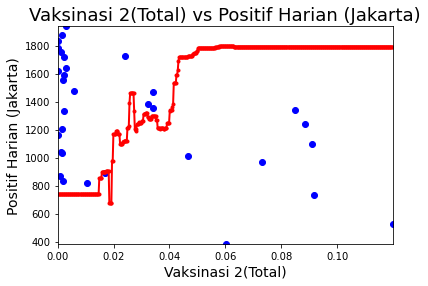

In [132]:
plot_regression_predictions(rnd_clf, xvak_8, y_vak, axes=[xvak_8.min(), xvak_8.max()
                                                         , y_vak.min(), y_vak.max()])

plt.title("Vaksinasi 2(Total) vs Positif Harian (Jakarta)", fontsize=18)
plt.xlabel("Vaksinasi 2(Total)", fontsize = 14)
plt.ylabel("Positif Harian (Jakarta)", fontsize = 14)

plt.show()

In [133]:
scorerndf_vak = rnd_clf_vak.score(xvak_8, y_vak)

In [134]:
print('Score Decision Tree Regressor=', score8_vak, 
      '\nScore Gradient Boost=', scoregrad_vak, 
      '\nScore Random Forest Regressor=', scorerndf_vak)

Score Decision Tree Regressor= 0.5031312052633682 
Score Gradient Boost= -2.0396633604882473 
Score Random Forest Regressor= 0.5898660888601249


#### Kesimpulan
Berdasarkan hasil yang didapat diatas, untuk perbandingan data  Positif Harian (Jakarta) dengan data Vaksinasi, perolehan score Random Forest lebih baik dengan 0.59 dibandingkan dengan Decision Tree dengan score 0.503 dan Gradient Boost yang hanya -2.04. Dapat disimpulkan bahwa Random Forest Regressor lebih dari baik kedua tipe regressor lainnya yaitu Decision Tree Regressor dan  Gradient Boost.

# Langkah 4

Pada Langkah 4, kami akan menerapkan PCA dari data pada Langkah 2 kemudian melakukan model Machine Learning seperti pada Langkah 3.

## Data RDT Ag

### PCA

Pada penerapan PCA kali ini, kami menggunakan metode Singular Value Decomposition (SVD). Pertama-tama kami akan melakukan centering pada data terlebih dahulu. Cara yang kami gunakan untuk melakukan centering adalah untuk setiap kolom $j=1,2,..,13$ dan $m$ adalah jumlah baris dari data $X_{train}$, yaitu 32.
<br>
\begin{equation}
M_{j}=\sum_{i=0}^{m}(X_{i,j})
\end{equation}
<br>
Kemudidan hitung nilai center untuk setiap baris pada kolom-kolom yang ada menggunakan:
<br>
\begin{equation}
C_{i,j}=X_{i,j} - M_{j}
\end{equation}
<br>

In [135]:
# Panggil library yang digunakan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Panggil dataset
dataset_rdt_ag = pd.read_csv('Final Data RDT Ag with Positif Harian Jakarta 5 Maret s.d. 5 April.csv')
# Tunjukkan 5 data pertama dataset
dataset_rdt_ag.head()

,Unnamed: 0,Positif Harian (Jakarta),Tes Harian,Positif Harian,Positivity Rate Harian
0,0,1159,1297,49,0.037779
1,1,1616,1425,60,0.042105
2,2,1834,1371,97,0.070751
3,3,1783,737,33,0.044776
4,4,867,502,18,0.035857


In [136]:
dataset_rdt_ag.shape

(32, 5)

In [137]:
x_rdt_ag = dataset_rdt_ag.iloc[:, 1:5].values
# y_rdt_ag = dataset_rdt_ag.iloc[:, 1].values

x_rdt_ag

array([[1.15900000e+03, 1.29700000e+03, 4.90000000e+01, 3.77794911e-02],
       [1.61600000e+03, 1.42500000e+03, 6.00000000e+01, 4.21052632e-02],
       [1.83400000e+03, 1.37100000e+03, 9.70000000e+01, 7.07512764e-02],
       [1.78300000e+03, 7.37000000e+02, 3.30000000e+01, 4.47761194e-02],
       [8.67000000e+02, 5.02000000e+02, 1.80000000e+01, 3.58565737e-02],
       [1.04000000e+03, 8.16000000e+03, 2.62000000e+02, 3.21078431e-02],
       [1.75400000e+03, 2.52600000e+03, 1.11000000e+02, 4.39429929e-02],
       [1.87300000e+03, 2.11900000e+03, 1.17000000e+02, 5.52147239e-02],
       [1.03400000e+03, 1.64700000e+03, 5.50000000e+01, 3.33940498e-02],
       [1.20400000e+03, 2.61700000e+03, 1.07000000e+02, 4.08865113e-02],
       [1.55500000e+03, 1.51300000e+03, 5.10000000e+01, 3.37078652e-02],
       [8.35000000e+02, 4.11500000e+03, 1.14000000e+02, 2.77035237e-02],
       [1.33000000e+03, 3.47300000e+03, 1.04000000e+02, 2.99452923e-02],
       [1.71900000e+03, 4.17300000e+03, 1.33000000e

In [138]:
# Cel ini nantinya hilang, because data testnya adalah rentang waktu 6 April - 13 April
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
# x_train_rdt_ag, x_test_rdt_ag, y_train_rdt_ag, y_test_rdt_ag = train_test_split(x_rdt_ag, y_rdt_ag, test_size = 0.2, random_state = 0)
x_train_rdt_ag, x_test_rdt_ag = train_test_split(x_rdt_ag, test_size = 0.2, random_state = 0)

In [139]:
x_train_rdt_ag
x_test_rdt_ag

array([[8.35000000e+02, 4.11500000e+03, 1.14000000e+02, 2.77035237e-02],
       [1.35400000e+03, 3.79000000e+03, 1.04000000e+02, 2.74406333e-02],
       [1.55500000e+03, 1.51300000e+03, 5.10000000e+01, 3.37078652e-02],
       [1.83400000e+03, 1.37100000e+03, 9.70000000e+01, 7.07512764e-02],
       [1.63800000e+03, 2.31000000e+03, 7.10000000e+01, 3.07359307e-02],
       [1.58800000e+03, 3.21400000e+03, 9.10000000e+01, 2.83136279e-02],
       [1.24000000e+03, 3.38300000e+03, 6.80000000e+01, 2.01005025e-02]])

In [140]:
len(x_train_rdt_ag), len(x_test_rdt_ag)

(25, 7)

In [141]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_rdt_ag = StandardScaler()

x_train_rdt_ag = sc_rdt_ag.fit_transform(x_train_rdt_ag)
x_test_rdt_ag = sc_rdt_ag.transform(x_test_rdt_ag)

In [142]:
x_train_rdt_ag[0]

array([-0.66954299,  0.67040062,  0.11937947, -0.82875077])

In [143]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

# Hitung nilai rata-rata untuk masing-masing kolom
M_rdt_ag = mean(x_train_rdt_ag.T, axis=1)
# Lakukan centering dengan mengurangi nilai kolom dengan nilai rata-rata yang diperoleh
C_rdt_ag = x_train_rdt_ag - M_rdt_ag
print(C_rdt_ag[0])

[-0.66954299  0.67040062  0.11937947 -0.82875077]


In [144]:
# Hitung tiga matriks U, Sigma, dan V_{t} dengan menggunakan fungsi svd()
U_rdt_ag, s_rdt_ag, Vt_rdt_ag = np.linalg.svd(C_rdt_ag)

In [145]:
U_rdt_ag[0]

array([-0.06640257,  0.1794408 , -0.03162297,  0.27962075, -0.09246802,
        0.13423296, -0.00385563, -0.16889857, -0.5581021 ,  0.14125556,
        0.17060264, -0.21189648,  0.33775436, -0.08920861, -0.18710918,
        0.01662538, -0.12179229,  0.1327111 ,  0.39089736, -0.1669597 ,
        0.13581547,  0.02210045, -0.03410678,  0.18013829,  0.02579508])

In [146]:
s_rdt_ag

array([6.90272446, 6.49836141, 3.14313223, 0.49438231])

In [147]:
Vt_rdt_ag[0]

array([-0.10075043, -0.69263369, -0.71364462, -0.02862285])

In [148]:
# n adalah jumlah kolom yang akan dipertahankan 
n_rdt_ag = 2
# project data
W_d_rdt_ag = Vt_rdt_ag.T[:,:n_rdt_ag]
X_d_rdt_ag = C_rdt_ag.dot(W_d_rdt_ag)
X_d_rdt_ag

array([[-4.58358620e-01,  1.16607114e+00],
       [-7.76530878e-01, -3.42660539e-01],
       [-1.48521493e+00, -7.10828909e-01],
       [ 9.23118445e-01,  8.07257077e-01],
       [-4.96609252e+00,  6.94742627e-01],
       [ 1.13100301e+00, -8.29055763e-01],
       [ 9.29618705e-01,  6.89353083e-02],
       [ 8.37047519e-01,  1.39357633e+00],
       [ 1.75107206e-04,  2.46886720e+00],
       [ 7.92801282e-01, -7.29945506e-01],
       [ 7.89851128e-01, -1.54602071e+00],
       [ 1.56414839e+00,  2.59517666e+00],
       [-4.77844461e-01, -1.83853132e+00],
       [ 2.00820175e+00,  6.39972511e-02],
       [-4.78576027e-01,  9.98916053e-01],
       [ 1.32832483e+00,  1.10315359e+00],
       [-1.01047687e+00,  7.09610009e-01],
       [-3.18841198e-01, -7.08520473e-01],
       [-4.45919847e-01, -2.92093246e+00],
       [-3.34357523e-01,  6.97738416e-01],
       [ 1.43909449e+00, -2.05936974e+00],
       [ 1.12914855e+00, -4.91294931e-01],
       [-8.64816169e-01,  1.67010533e-01],
       [-6.

In [149]:
x_rdt_ag = []

for i in range(0, len(X_d_rdt_ag)):
    x_rdt_ag.append(X_d_rdt_ag[i][0])

for index in range(0, len(x_rdt_ag)):
    x_rdt_ag = np.c_[x_rdt_ag]

x_rdt_ag

array([[-4.58358620e-01],
       [-7.76530878e-01],
       [-1.48521493e+00],
       [ 9.23118445e-01],
       [-4.96609252e+00],
       [ 1.13100301e+00],
       [ 9.29618705e-01],
       [ 8.37047519e-01],
       [ 1.75107206e-04],
       [ 7.92801282e-01],
       [ 7.89851128e-01],
       [ 1.56414839e+00],
       [-4.77844461e-01],
       [ 2.00820175e+00],
       [-4.78576027e-01],
       [ 1.32832483e+00],
       [-1.01047687e+00],
       [-3.18841198e-01],
       [-4.45919847e-01],
       [-3.34357523e-01],
       [ 1.43909449e+00],
       [ 1.12914855e+00],
       [-8.64816169e-01],
       [-6.01446170e-01],
       [-6.54057998e-01]])

In [150]:
y_rdt_ag = []

for i in range(0, len(X_d_rdt_ag)):
    y_rdt_ag.append(X_d_rdt_ag[i][1])

for index in range(0, len(x_rdt_ag)):
    y_rdt_ag = np.c_[y_rdt_ag]

y_rdt_ag

array([[ 1.16607114],
       [-0.34266054],
       [-0.71082891],
       [ 0.80725708],
       [ 0.69474263],
       [-0.82905576],
       [ 0.06893531],
       [ 1.39357633],
       [ 2.4688672 ],
       [-0.72994551],
       [-1.54602071],
       [ 2.59517666],
       [-1.83853132],
       [ 0.06399725],
       [ 0.99891605],
       [ 1.10315359],
       [ 0.70961001],
       [-0.70852047],
       [-2.92093246],
       [ 0.69773842],
       [-2.05936974],
       [-0.49129493],
       [ 0.16701053],
       [-0.768684  ],
       [ 0.01079216]])

### Decision Tree Regressor Model

In [151]:
#Pembuatan Model
from sklearn.tree import DecisionTreeRegressor

tree_reg_rdt_ag = DecisionTreeRegressor(random_state=1, max_depth=3)

In [152]:
#Fitting X dan y
tree_reg_rdt_ag = tree_reg_rdt_ag.fit(x_rdt_ag, y_rdt_ag)
tree_reg_rdt_ag

DecisionTreeRegressor(max_depth=3, random_state=1)

In [153]:
#Melakukan prediction dan menyimpannya menggunakan "ypred_reg3"
y_pred_reg_rdt_ag = tree_reg_rdt_ag.predict(xag_test)
y_pred_reg_rdt_ag

array([-0.08109323, -0.08109323, -0.08109323, -0.08109323, -0.08109323,
       -0.08109323])

In [154]:
score_tr_rdt_ag = tree_reg_rdt_ag.score(x_rdt_ag, y_rdt_ag)
score_tr_rdt_ag

0.2921019869221233

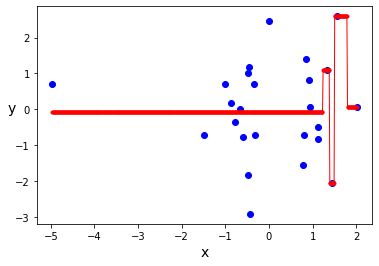

In [155]:
#Melakukan Plotting
import matplotlib.pyplot as plt
import numpy as np

plt.plot(x_rdt_ag, y_rdt_ag, "bo")
axes=[x_rdt_ag.min(), x_rdt_ag.max(), y_pred_reg_rdt_ag.min(), y_pred_reg_rdt_ag.max()]
x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
y_pred = tree_reg_rdt_ag.predict(x1)
plt.plot(x1, y_pred, "r.-", linewidth=1, label=r"$\hat{y}$")
plt.xlabel("x", fontsize = 14)
plt.ylabel("y", rotation = 0, fontsize = 14)
plt.show()

### Gradient Boost Model

In [156]:
#Membuat Model
from sklearn.ensemble import GradientBoostingRegressor

grad_boost_reg = GradientBoostingRegressor(max_depth=4, n_estimators=10, learning_rate=0.1, random_state=1)

#fitting
grad_boost_reg.fit(x_rdt_ag, y_rdt_ag.ravel())

GradientBoostingRegressor(max_depth=4, n_estimators=10, random_state=1)

In [157]:
grad_boost_reg_score = grad_boost_reg.score(x_rdt_ag, y_rdt_ag)
grad_boost_reg_score

0.4847685358101097

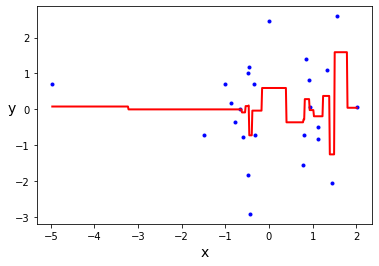

In [158]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)

plot_predictions([grad_boost_reg], x_rdt_ag, y_rdt_ag, axes=[x_rdt_ag.min(), x_rdt_ag.max(), y_rdt_ag.min(), y_rdt_ag.max()], label="Ensemble predictions")
plt.xlabel("x", fontsize = 14)
plt.ylabel("y", rotation = 0, fontsize = 14)
plt.show()

### Random Forest Regression Model

In [159]:
#Pembuatan model
from sklearn.ensemble import RandomForestRegressor
ran_for_clf_rdt_ag = RandomForestRegressor(max_depth=3, random_state=0)
ran_for_clf_rdt_ag = ran_for_clf_rdt_ag.fit(x_rdt_ag, y_rdt_ag.ravel())
ran_for_clf_rdt_ag

RandomForestRegressor(max_depth=3, random_state=0)

In [160]:
#Membuat prediksi
y_pred_rfc_rdt = ran_for_clf_rdt_ag.predict(xag_test)

In [161]:
rfc_rdt_ag_score = ran_for_clf_rdt_ag.score(x_rdt_ag, y_rdt_ag)
rfc_rdt_ag_score

0.41680016639117234

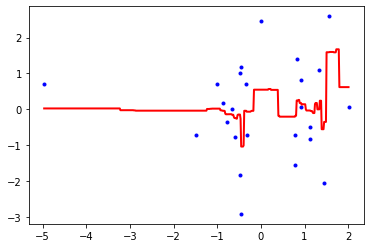

In [162]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
#     plt.axis(axes)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r-", linewidth=2,)

plt.figure(figsize=(6, 4))

plot_regression_predictions(ran_for_clf_rdt_ag, x_rdt_ag, y_rdt_ag, axes=[x_rdt_ag.min(), x_rdt_ag.max(), y_pred_rfc_rdt.min(), y_pred_rfc_rdt.max()])

# plt.title("Vaksinasi 2(Total) vs Positif Harian (Jakarta)", fontsize=18)
# plt.xlabel("Vaksinasi 2(Total)", fontsize = 14)
# plt.ylabel("Positif Harian (Jakarta)", fontsize = 14)

plt.show()

### PCA Data Vaksinasi

In [163]:
# Panggil library yang digunakan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Panggil dataset
dataset_vaksinasi = pd.read_csv('Final Data Vaksinasi Jakarta with Poisitif Harian Jakarta 5 Maret s.d. 5 April.csv')
# Tunjukkan 5 data pertama dataset
dataset_vaksinasi.head()

,Unnamed: 0,Vaksinasi 1(Tenaga Kesehatan),Vaksinasi 2(Tenaga Kesehatan),Persentase 1(Tenaga Kesehatan),Persentase 2(Tenaga Kesehatan),Vaksinasi 1(Lansia),Vaksinasi 2(Lansia),Persentase 1(Lansia),Persentase 2(Lansia),Vaksinasi 1(Pelayan Publik),Vaksinasi 2(Pelayan Publik),Persentase 1(Pelayan Publik),Persentase 2(Pelayan Publik),Vaksinasi 1(Total),Vaksinasi 2(Total),Persentase 1(Total),Persentase 2(Total),Positif Harian (Jakarta)
0,0,141425,91078,1.259339,0.811017,76451,0,0.083862,0.000000,64121,0,0.032437,0.000000,281997,91078,0.093977,0.030352,1159
1,1,144046,91379,1.282678,0.813697,79421,0,0.087120,0.000000,66484,0,0.033633,0.000000,289951,91379,0.096628,0.030453,1616
2,2,177126,91460,1.577243,0.814418,83628,0,0.091734,0.000000,73752,2514,0.037310,0.001272,334506,93974,0.111476,0.031317,1834
3,3,181237,92988,1.613850,0.828025,95140,1,0.104362,0.000001,85333,3989,0.043168,0.002018,361710,96978,0.120542,0.032319,1783
4,4,113326,89984,1.009127,0.801275,135128,675,0.148227,0.000740,174685,29195,0.088369,0.014769,423139,119854,0.141014,0.039942,867


In [164]:
dataset_vaksinasi.shape

(32, 18)

In [165]:
x_vaksinasi = dataset_vaksinasi.iloc[:, 1:19].values
# y_vaksinasi = dataset_vaksinasi.iloc[:, 1].values

x_vaksinasi

array([[1.41425000e+05, 9.10780000e+04, 1.25933874e+00, 8.11016821e-01,
        7.64510000e+04, 0.00000000e+00, 8.38617818e-02, 0.00000000e+00,
        6.41210000e+04, 0.00000000e+00, 3.24374721e-02, 0.00000000e+00,
        2.81997000e+05, 9.10780000e+04, 9.39774165e-02, 3.03523624e-02,
        1.15900000e+03],
       [1.44046000e+05, 9.13790000e+04, 1.28267780e+00, 8.13697118e-01,
        7.94210000e+04, 0.00000000e+00, 8.71196789e-02, 0.00000000e+00,
        6.64840000e+04, 0.00000000e+00, 3.36328643e-02, 0.00000000e+00,
        2.89951000e+05, 9.13790000e+04, 9.66281411e-02, 3.04526727e-02,
        1.61600000e+03],
       [1.77126000e+05, 9.14600000e+04, 1.57724330e+00, 8.14418393e-01,
        8.36280000e+04, 0.00000000e+00, 9.17344847e-02, 0.00000000e+00,
        7.37520000e+04, 2.51400000e+03, 3.73095934e-02, 1.27177999e-03,
        3.34506000e+05, 9.39740000e+04, 1.11476398e-01, 3.13174741e-02,
        1.83400000e+03],
       [1.81237000e+05, 9.29880000e+04, 1.61385028e+00, 8.280

In [166]:
# Cel ini nantinya hilang, because data testnya adalah rentang waktu 6 April - 13 April
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
# x_train_vaksinasi, x_test_vaksinasi, y_train_vaksinasi, y_test_vaksinasi = train_test_split(x_vaksinasi, y_vaksinasi, test_size = 0.2, random_state = 0)
x_train_vaksinasi, x_test_vaksinasi = train_test_split(x_vaksinasi, test_size = 0.2, random_state = 0)

In [167]:
len(x_train_vaksinasi), len(x_test_vaksinasi)

(25, 7)

In [168]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_vak = StandardScaler()

x_train_vaksinasi = sc_vak.fit_transform(x_train_vaksinasi)
x_test_vaksinasi = sc_vak.transform(x_test_vaksinasi)

In [169]:
x_train_vaksinasi[0]

array([-0.13996568,  1.08958321, -0.13996568,  1.08958321,  1.18209633,
        1.2413809 ,  1.18209633,  1.2413809 ,  1.10592002,  1.27810142,
        1.10592002,  1.27810142,  1.14628645,  1.28306694,  1.14628645,
        1.28306694, -0.66954299])

In [170]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

# Hitung nilai rata-rata untuk masing-masing kolom
M_vak = mean(x_train_vaksinasi.T, axis=1)
# Lakukan centering dengan mengurangi nilai kolom dengan nilai rata-rata yang diperoleh
C_vak = x_train_vaksinasi - M_vak
print(C_vak[0])

[-0.13996568  1.08958321 -0.13996568  1.08958321  1.18209633  1.2413809
  1.18209633  1.2413809   1.10592002  1.27810142  1.10592002  1.27810142
  1.14628645  1.28306694  1.14628645  1.28306694 -0.66954299]


Nilai SVD dari $C$ akan mendekomposisi matriks $C$ menjadi perkalian dari tiga buah matriks $U \Sigma V_{t}$:
<br>
<br>
\begin{equation}
C=U \Sigma V_{t}
\end{equation}
<br>
Di mana $V_{t}$ berisikan unit vektor yang mendefinisikan semua principal component yang kita cari.

In [171]:
# Hitung tiga matriks U, Sigma, dan V_{t} dengan menggunakan fungsi svd()
U_vak, s_vak, Vt_vak = np.linalg.svd(C_vak)

In [172]:
U_vak[0]

array([-0.2418203 ,  0.04955968, -0.04453166, -0.04802462, -0.03680765,
        0.22615979,  0.15701663,  0.09234197, -0.02111391,  0.4806612 ,
        0.06541598, -0.04969262, -0.2260421 ,  0.18680775,  0.1195985 ,
        0.32636527, -0.09464863,  0.20753261,  0.0740783 , -0.21648303,
        0.46982103,  0.24290936,  0.08002269, -0.06709566, -0.09502799])

In [173]:
s_vak

array([1.85700668e+01, 6.98884166e+00, 4.66701528e+00, 2.82782572e+00,
       1.02299246e+00, 6.63114419e-01, 2.11772802e-01, 4.74468010e-09,
       1.47004770e-09, 1.26861285e-09, 9.11465022e-10, 8.00900805e-10,
       6.13992248e-10, 3.97670716e-10, 2.95428060e-10, 6.91406198e-16,
       3.12228035e-16])

In [174]:
Vt_vak[0]

array([ 0.0819403 , -0.25969388,  0.0819403 , -0.25969388, -0.26568587,
       -0.24546173, -0.26568587, -0.24546173, -0.26703197, -0.26808295,
       -0.26703197, -0.26808295, -0.26711991, -0.26709923, -0.26711991,
       -0.26709923,  0.13516543])

In [175]:
# n adalah jumlah kolom yang akan dipertahankan 
n_vak = 2
# project data
W_d_vak = Vt_vak.T[:,:n_vak]
X_d_vak = C_vak.dot(W_d_vak)
X_d_vak

array([[-4.49061915,  0.34636477],
       [-1.36546939,  0.00937091],
       [ 1.35367392, -0.49621129],
       [-3.16209357,  0.0913465 ],
       [ 3.61232639, -1.41982817],
       [ 0.35425709, -0.43855531],
       [ 3.22490346, -1.24949717],
       [-5.48516821,  0.29478911],
       [-4.0388959 ,  0.04886896],
       [-2.37957359,  0.08621596],
       [ 5.11039578,  1.63151924],
       [-6.38745271,  0.49252974],
       [ 3.80160893, -1.20989785],
       [ 3.70281275, -1.81501241],
       [-0.45766996, -0.49391055],
       [-5.27689917,  0.39513729],
       [-1.18739799, -0.3287038 ],
       [ 3.22454666, -1.20182274],
       [ 3.60550622, -1.0256857 ],
       [-5.03059839,  0.75817051],
       [ 5.23905588,  5.56111891],
       [ 4.98593486,  1.21866454],
       [-2.09472341,  0.04864619],
       [ 1.08518761, -0.4305754 ],
       [ 2.05635188, -0.87304223]])

In [176]:
x_vak = []

for i in range(0, len(X_d_vak)):
    x_vak.append(X_d_vak[i][0])

for index in range(0, len(x_vak)):
    x_vak = np.c_[x_vak]

x_vak

array([[-4.49061915],
       [-1.36546939],
       [ 1.35367392],
       [-3.16209357],
       [ 3.61232639],
       [ 0.35425709],
       [ 3.22490346],
       [-5.48516821],
       [-4.0388959 ],
       [-2.37957359],
       [ 5.11039578],
       [-6.38745271],
       [ 3.80160893],
       [ 3.70281275],
       [-0.45766996],
       [-5.27689917],
       [-1.18739799],
       [ 3.22454666],
       [ 3.60550622],
       [-5.03059839],
       [ 5.23905588],
       [ 4.98593486],
       [-2.09472341],
       [ 1.08518761],
       [ 2.05635188]])

In [177]:
y_vak = []

for i in range(0, len(X_d_vak)):
    y_vak.append(X_d_vak[i][1])

for index in range(0, len(y_vak)):
    y_vak = np.c_[y_vak]

y_vak

array([[ 0.34636477],
       [ 0.00937091],
       [-0.49621129],
       [ 0.0913465 ],
       [-1.41982817],
       [-0.43855531],
       [-1.24949717],
       [ 0.29478911],
       [ 0.04886896],
       [ 0.08621596],
       [ 1.63151924],
       [ 0.49252974],
       [-1.20989785],
       [-1.81501241],
       [-0.49391055],
       [ 0.39513729],
       [-0.3287038 ],
       [-1.20182274],
       [-1.0256857 ],
       [ 0.75817051],
       [ 5.56111891],
       [ 1.21866454],
       [ 0.04864619],
       [-0.4305754 ],
       [-0.87304223]])

### Decision Tree Regressor Model

In [178]:
#Pembuatan Model
from sklearn.tree import DecisionTreeRegressor

tree_reg_vak = DecisionTreeRegressor(random_state=1, max_depth=3)

In [179]:
#Fitting X dan y
tree_reg_vak = tree_reg_vak.fit(x_vak, y_vak)
tree_reg_vak

DecisionTreeRegressor(max_depth=3, random_state=1)

In [180]:
#Melakukan prediction dan menyimpannya menggunakan "ypred_reg3"
y_pred_reg_vak = tree_reg_vak.predict(xvak_test)
y_pred_reg_vak

array([0.02556557, 0.02556557, 0.02556557, 0.02556557, 0.02556557,
       0.02556557])

In [181]:
score_tr_vak = tree_reg_vak.score(x_vak, y_vak)
score_tr_vak

0.9444903217104001

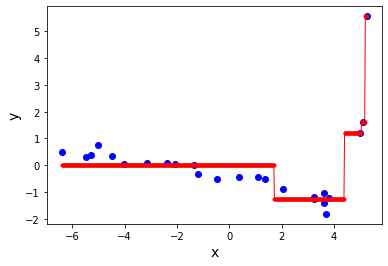

In [182]:
plt.plot(x_vak, y_vak, "bo")
axes=[x_vak.min(), x_vak.max(), y_pred_reg_vak.min(), y_pred_reg_vak.max()]
x1_vak = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
y_pred_vak = tree_reg_vak.predict(x1_vak)
plt.plot(x1_vak, y_pred_vak, "r.-", linewidth=1, label=r"$\hat{y}$")
plt.xlabel("x", fontsize = 14)
plt.ylabel("y", fontsize = 14)
plt.show()

### Gradient Boost Model

In [183]:
#Membuat Model
from sklearn.ensemble import GradientBoostingRegressor

grad_boost_reg_vak = GradientBoostingRegressor(max_depth=4, n_estimators=10, learning_rate=0.1, random_state=1)

#fitting
grad_boost_reg_vak.fit(x_vak, y_vak.ravel())

GradientBoostingRegressor(max_depth=4, n_estimators=10, random_state=1)

In [184]:
grad_boost_reg_score_vak = grad_boost_reg_vak.score(x_vak, y_vak)
grad_boost_reg_score_vak

0.8692485771082835

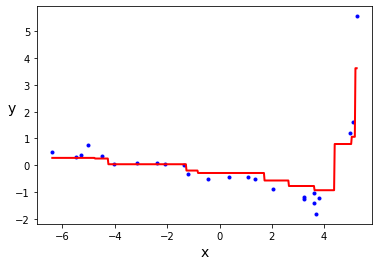

In [185]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)

plot_predictions([grad_boost_reg_vak], x_vak, y_vak, axes=[x_vak.min(), x_vak.max(), y_vak.min(), y_vak.max()], label="Ensemble predictions")
plt.xlabel("x", fontsize = 14)
plt.ylabel("y", rotation = 0, fontsize = 14)
plt.show()

### Random Forest Regression Model

In [186]:
#Pembuatan model
from sklearn.ensemble import RandomForestRegressor
ran_for_clf_vak = RandomForestRegressor(max_depth=3, random_state=0)
ran_for_clf_vak = ran_for_clf_vak.fit(x_vak, y_vak.ravel())
ran_for_clf_vak

RandomForestRegressor(max_depth=3, random_state=0)

In [187]:
#Membuat prediksi
y_pred_rfc_vak = ran_for_clf_vak.predict(xvak_test)

In [188]:
rfc_vak_score = ran_for_clf_rdt_ag.score(x_vak, y_vak)
rfc_vak_score

-0.10228320280390624

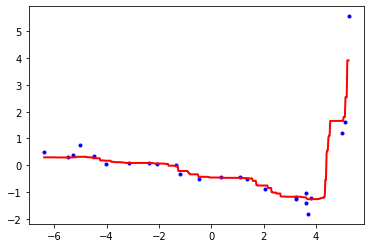

In [189]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r-", linewidth=2,)

plt.figure(figsize=(6, 4))

plot_regression_predictions(ran_for_clf_vak, x_vak, y_vak, axes=[x_vak.min(), x_vak.max(), y_pred_rfc_vak.min(), y_pred_rfc_vak.max()])

# plt.title("Vaksinasi 2(Total) vs Positif Harian (Jakarta)", fontsize=18)
# plt.xlabel("Vaksinasi 2(Total)", fontsize = 14)
# plt.ylabel("Positif Harian (Jakarta)", fontsize = 14)

# Langkah 5

Pada langkah ini, kami akan mengolah data dengan menambahkan kolom "Class" pada data yang telah kami olah sebelumnya pada langkah 2. Pembagian kelas ini dikategorikan sebagai berikut:
* Jika nilai kolom Positivity Rate kurang dari 3.3 persen diberi nilai 0
* Jika nilai kolom Positivity Rate lebih dari 5.0 persen diberi nilai 2
* Sisanya diberi nilai 1

In [190]:
# Import data dan menyimpan data
agjak_pos = pd.read_csv("Final Data RDT Ag with Positif Harian Jakarta 5 Maret s.d. 5 April.csv").iloc[:,1:]
vakjak = pd.read_csv("Final Data Vaksinasi Jakarta with Poisitif Harian Jakarta 5 Maret s.d. 5 April.csv").iloc[:,1:]

### Classifying RDT Ag Data

In [191]:
#Mengambil data positifity saja
positifity_ag = agjak_pos['Positivity Rate Harian']
positifity_ag.head()

0    0.037779
1    0.042105
2    0.070751
3    0.044776
4    0.035857
Name: Positivity Rate Harian, dtype: float64

In [192]:
class_agrow = []
#Classification terhadap positifity
for i in range(0,len(positifity_ag)):
    if positifity_ag[i]<0.033:#3.3%
        class_agrow.append(0)
    elif positifity_ag[i]<0.05:#5.0%
        class_agrow.append(2)
    else:
        class_agrow.append(1)
class_ag = pd.Series(class_agrow)

In [193]:
#Menyatukan class dengan data
rdt_ag = pd.concat([class_ag, agjak_pos], axis = 1).rename(columns={0:'Class'})
rdt_ag.head()

,Class,Positif Harian (Jakarta),Tes Harian,Positif Harian,Positivity Rate Harian
0,2,1159,1297,49,0.037779
1,2,1616,1425,60,0.042105
2,1,1834,1371,97,0.070751
3,2,1783,737,33,0.044776
4,2,867,502,18,0.035857


In [194]:
#Menyatukan Class pada data Vaksinasi
vak_jak = pd.concat([class_ag, vakjak], axis = 1).rename(columns={0:'Class'})
vak_jak.head()

,Class,Vaksinasi 1(Tenaga Kesehatan),Vaksinasi 2(Tenaga Kesehatan),Persentase 1(Tenaga Kesehatan),Persentase 2(Tenaga Kesehatan),Vaksinasi 1(Lansia),Vaksinasi 2(Lansia),Persentase 1(Lansia),Persentase 2(Lansia),Vaksinasi 1(Pelayan Publik),Vaksinasi 2(Pelayan Publik),Persentase 1(Pelayan Publik),Persentase 2(Pelayan Publik),Vaksinasi 1(Total),Vaksinasi 2(Total),Persentase 1(Total),Persentase 2(Total),Positif Harian (Jakarta)
0,2,141425,91078,1.259339,0.811017,76451,0,0.083862,0.000000,64121,0,0.032437,0.000000,281997,91078,0.093977,0.030352,1159
1,2,144046,91379,1.282678,0.813697,79421,0,0.087120,0.000000,66484,0,0.033633,0.000000,289951,91379,0.096628,0.030453,1616
2,1,177126,91460,1.577243,0.814418,83628,0,0.091734,0.000000,73752,2514,0.037310,0.001272,334506,93974,0.111476,0.031317,1834
3,2,181237,92988,1.613850,0.828025,95140,1,0.104362,0.000001,85333,3989,0.043168,0.002018,361710,96978,0.120542,0.032319,1783
4,2,113326,89984,1.009127,0.801275,135128,675,0.148227,0.000740,174685,29195,0.088369,0.014769,423139,119854,0.141014,0.039942,867


Kami langsung menyatukan class pada data Vaksinasi karena kami mengasumsikan bahwa Positivity sama dengan data RDT Ag

In [195]:
#Saving data as CSV
rdt_ag.to_csv("rdt_ag.csv")
vak_jak.to_csv("vak_jak.csv")

### Memberi class pada data test

In [196]:
#Memanggil data Test
rdt_test = pd.read_csv('data_test_rdt.csv').iloc[:,1:]
vksns_test = pd.read_csv('data_test_vksns.csv').iloc[:,1:]

In [197]:
#Mengambil data positifity saja pada data test
positifity_ag_test = rdt_test['Positivity Rate Harian']
positifity_ag_test

0    0.017151
1    0.020191
2    0.022294
3    0.022516
4    0.015927
5    0.023137
Name: Positivity Rate Harian, dtype: float64

In [198]:
class_agrowtest = []
#Classification terhadap positifity
for i in range(0,len(positifity_ag_test)):
    if positifity_ag_test[i]<0.033:#3.3%
        class_agrowtest.append(0)
    elif positifity_ag_test[i]<0.05:#5.0%
        class_agrowtest.append(2)
    else:
        class_agrowtest.append(1)
class_ag_test = pd.Series(class_agrowtest)
class_ag_test

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [199]:
#Menyatukan class dengan data RDT Ag Test
rdt_ag_test = pd.concat([class_ag_test, rdt_test], axis = 1).rename(columns={0:'Class'})
rdt_ag_test

,Class,Positif Harian (Jakarta),Tes Harian,Positif Harian,Positivity Rate Harian
0,0,487,4373,75,0.017151
1,0,862,3665,74,0.020191
2,0,1239,4306,96,0.022294
3,0,1013,4619,104,0.022516
4,0,977,4081,65,0.015927
5,0,1031,2550,59,0.023137


In [200]:
#Menyatukan Class pada data Vaksinasi test
vak_jak_test = pd.concat([class_ag_test, vksns_test], axis = 1).rename(columns={0:'Class'})
vak_jak_test

,Class,Positif Harian (Jakarta),Vaksinasi 1(Tenaga Kesehatan),Vaksinasi 2(Tenaga Kesehatan),Persentase 1(Tenaga Kesehatan),Persentase 2(Tenaga Kesehatan),Vaksinasi 1(Lansia),Vaksinasi 2(Lansia),Persentase 1(Lansia),Persentase 2(Lansia),Vaksinasi 1(Pelayan Publik),Vaksinasi 2(Pelayan Publik),Persentase 1(Pelayan Publik),Persentase 2(Pelayan Publik),Vaksinasi 1(Total),Vaksinasi 2(Total),Persentase 1(Total),Persentase 2(Total)
0,0,487,122326,106437,1.089269,0.947783,496569,124880,0.544704,0.136985,796248,349648,0.402805,0.176880,1415143,580965,0.471606,0.193611
1,0,862,122553,106800,1.091290,0.951016,500370,142698,0.548873,0.156530,813740,369813,0.411654,0.187081,1436663,619311,0.478778,0.206390
2,0,1239,123061,107175,1.095814,0.954355,507667,148824,0.556878,0.163250,844961,388298,0.427448,0.196432,1475689,644297,0.491783,0.214716
3,0,1013,123387,107509,1.098717,0.957329,516816,166705,0.566914,0.182865,866503,402918,0.438346,0.203828,1506706,677132,0.502120,0.225659
4,0,977,123474,107573,1.099492,0.957899,523861,173234,0.574641,0.190026,880884,406805,0.445621,0.205794,1528219,687612,0.509289,0.229151
5,0,1031,123485,107583,1.099589,0.957988,526687,177883,0.577741,0.195126,887215,412014,0.448824,0.208429,1537387,697480,0.512345,0.232440


In [201]:
rdt_ag_test.to_csv('rdt_ag_test.csv')
vak_jak_test.to_csv('vak_jak_test.csv')

# Langkah 6

Pada langkah 6 ini, kami akan melakukan model Machine Learning dari data yang telah diolah pada Langkah 5. Kami akan menerapkan Voting Classifiers yang didalamnya terdapat beberapa model yaitu Random Forest Classifier, SVC, dan Logistic Regression. Selain menerapkan Voting Classifiers kami juga akan menerapkan AdaBoost.

## Modelling Data RDT Ag 

### Voting Classifiers:

RandomForest Classifier,SVC, Logistic Regression

In [202]:
data_rdtag = pd.read_csv('rdt_ag.csv').iloc[:,1:]

In [203]:
x6ag = data_rdtag[['Positif Harian (Jakarta)', 'Tes Harian', 'Positif Harian']]
y6ag = data_rdtag['Class']

In [204]:
#Split Manual, Test as data 6 April and after. Train as data 5 March to 5 April
thisdatatest_1 = pd.read_csv('rdt_ag_test.csv').iloc[:,1:]

x6ag_train = x6ag
y6ag_train = y6ag
x6ag_test = thisdatatest_1[['Positif Harian (Jakarta)', 'Tes Harian', 'Positif Harian']]
y6ag_test = thisdatatest_1['Class']

### Cara Manual Decomposition, menggunakan Eigen Decomposition
<br>
\begin{equation}
M_{j}=\sum_{i=0}^{m}(X_{i,j})
\end{equation}
<br>
$m$ adalah jumlah baris dari Variable
<br>
\begin{equation}
C_{i,j}=X_{i,j} - M_{j}
\end{equation}
<br>
menghitung matriks kovariansi nilai C, yaitu $V=covariance(C)$
Menghitung nilai center pada kolom-kolom
<br>
\begin{equation}
V=\frac{\mathbf{C}^T\mathbf{C}}{m-1}
\end{equation}
<br>

In [205]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X6ag_train = pca.fit_transform(x6ag_train)
X6ag_test = pca.transform(x6ag_test)

In [206]:
#Melakukan modeling VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=1)
log_clf = LogisticRegression(solver="lbfgs", random_state=1)
svm_clf = SVC(gamma="scale", random_state=1)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')

In [207]:
voting_clf.fit(X6ag_train, y6ag_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1)),
                             ('rf', RandomForestClassifier(random_state=1)),
                             ('svc', SVC(random_state=1))])

In [208]:
#Mencetak score (akurasi)
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X6ag_train, y6ag_train)
    y6_pred = clf.predict(X6ag_test)
    print(clf.__class__.__name__, accuracy_score(y6ag_test, y6_pred))

LogisticRegression 1.0
RandomForestClassifier 1.0
SVC 1.0
VotingClassifier 1.0


### AdaBoost

In [209]:
#Membuat model AdaBooster
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clfag = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1),
                               n_estimators=100, algorithm="SAMME.R",
                               learning_rate=0.5, random_state=42)
ada_clfag.fit(X6ag_train, y6ag_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=100, random_state=42)

In [210]:
#Mencetak score, akurasi
print('AdaBooster Score= ', ada_clfag.score(X6ag_train, y6ag_train))

AdaBooster Score=  0.9375


## Modelling Data Vaksin

### Voting Classifiers:

RandomForest Classifier,
Voting Classifier,
Logistic Regression

In [211]:
#Memanggil data, sekaligus membuat yang tidak penting
data_vakjak_a= pd.read_csv('vak_jak.csv').iloc[:,1:]
data_vakjak = data_vakjak_a.loc[:31]
data_vakjak.head()

,Class,Vaksinasi 1(Tenaga Kesehatan),Vaksinasi 2(Tenaga Kesehatan),Persentase 1(Tenaga Kesehatan),Persentase 2(Tenaga Kesehatan),Vaksinasi 1(Lansia),Vaksinasi 2(Lansia),Persentase 1(Lansia),Persentase 2(Lansia),Vaksinasi 1(Pelayan Publik),Vaksinasi 2(Pelayan Publik),Persentase 1(Pelayan Publik),Persentase 2(Pelayan Publik),Vaksinasi 1(Total),Vaksinasi 2(Total),Persentase 1(Total),Persentase 2(Total),Positif Harian (Jakarta)
0,2,141425,91078,1.259339,0.811017,76451,0,0.083862,0.000000,64121,0,0.032437,0.000000,281997,91078,0.093977,0.030352,1159
1,2,144046,91379,1.282678,0.813697,79421,0,0.087120,0.000000,66484,0,0.033633,0.000000,289951,91379,0.096628,0.030453,1616
2,1,177126,91460,1.577243,0.814418,83628,0,0.091734,0.000000,73752,2514,0.037310,0.001272,334506,93974,0.111476,0.031317,1834
3,2,181237,92988,1.613850,0.828025,95140,1,0.104362,0.000001,85333,3989,0.043168,0.002018,361710,96978,0.120542,0.032319,1783
4,2,113326,89984,1.009127,0.801275,135128,675,0.148227,0.000740,174685,29195,0.088369,0.014769,423139,119854,0.141014,0.039942,867


In [212]:
#Membagi data menjadi x dan y
x6vak  = data_vakjak.iloc[:,1:]
y6vak = data_vakjak['Class']

In [213]:
#Split Manual, Test as data 6 April and after. Train as data 5 March to 5 April
thisdatatest_2 = pd.read_csv('vak_jak_test.csv').iloc[:,1:]


x6vak_train = x6vak
y6vak_train = y6vak
x6vak_test = thisdatatest_2.iloc[:,1:]
y6vak_test = thisdatatest_2['Class']

In [214]:
# Applying PCA
from sklearn.decomposition import PCA
pca2 = PCA(n_components = 2)
X6vak_train = pca2.fit_transform(x6vak_train)
X6vak_test = pca2.transform(x6vak_test)

In [215]:
#Memulai modelling
rnd_clfvak = RandomForestClassifier(n_estimators=100, random_state=1)
log_clfvak = LogisticRegression(solver="lbfgs", random_state=1)
svm_clfvak = SVC(gamma="scale", random_state=1)

voting_clfvak = VotingClassifier(estimators=[('lr', log_clfvak), 
                                          ('rf', rnd_clfvak), 
                                          ('svc', svm_clfvak)], voting='hard')

In [216]:
voting_clf.fit(X6vak_train, y6vak_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1)),
                             ('rf', RandomForestClassifier(random_state=1)),
                             ('svc', SVC(random_state=1))])

In [217]:
#Mencetak score (akurasi)
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X6vak_train, y6vak_train)
    y6_predvak = clf.predict(X6vak_test)
    print(clf.__class__.__name__, accuracy_score(y6vak_test, y6_predvak))

LogisticRegression 0.0
RandomForestClassifier 0.0
SVC 1.0
VotingClassifier 1.0


### AdaBoost

In [218]:
#Membuat model AdaBooster
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clfvak = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1),
                               n_estimators=100, algorithm="SAMME.R",
                               learning_rate=0.5, random_state=42)
ada_clfvak.fit(X6vak_train, y6vak_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=100, random_state=42)

In [219]:
#Mencetak Score (akurasi)
print('AdaBooster Score= ', ada_clfvak.score(X6vak_train, y6vak_train))

AdaBooster Score=  0.90625


### Kesimpulan
**RDT Ag data**

Berdasarkan pengamatan Kami, model yang paling baik adalah **VotingClassifier**, karena model tersebut memiliki **score lebih besar** dari *AdaBooster*

**Vaksinasi data**

Berdasarkan pengamatan Kami, model yang paling baik adalah **VotingClassifier**, karena model tersebut memiliki **score lebih besar** dari *AdaBooster*